# Inicialización

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')  # allow importing from parent directory
from fun_gilles import *
import cmcrameri.cm as cmc
import pickle
import pandas as pd

In [2]:
def plot(abundances, times, V, species):
    colors = cmc.berlin(np.linspace(0, 1, len(species)))

    # --- Create the figure and a 1-row, 3-column subplot grid ---
    # Using a wide figsize for a horizontal layout.
    fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True) 
    # Note: sharex=True is removed because we need the x-axis ticks on all three plots, 
    # although they are the same (time).

    # --- Subplot 1 (Left): Concentration ---
    ax1 = axes[0]
    for i in range(len(species)):
        # Calculate Concentration = Abundance / Volume
        ax1.plot(times, abundances[:, i] / V, label=species[i], color=colors[i], alpha=0.9)
    ax1.grid(True, linestyle='--', alpha=0.3)
    ax1.set_xlabel("Time")
    ax1.set_ylabel("Concentration")
    ax1.set_title("Concentration Evolution")
    ax1.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), title="Species")


    # --- Subplot 2 (Middle): Volume ---
    ax2 = axes[1]
    ax2.plot(times, V, color='gray')
    ax2.grid(True, linestyle='--', alpha=0.3)
    ax2.set_xlabel("Time")
    ax2.set_ylabel("Volume")
    ax2.set_yscale("log")
    ax2.set_title("Volume Evolution")


    # --- Final Touches ---
    # Add a figure-wide title
    fig.suptitle(fr"Simulation Results ($K_1$ = {k[1]/k[0]}, $K_2$ = {k[3]/k[2]}, $K_3$ = {k[5]/k[4]}, $K_4$ = {k[7]/k[6]})",
                 fontsize=16)

    # Adjust layout to prevent labels/titles from overlapping
    plt.tight_layout(rect=[0, 0, 1, 1]) # Adjust tight_layout for a single row

    plt.show()

In [3]:
def plot_concentration(abundances, times, V):
    colors = cmc.berlin(np.linspace(0, 1, len(species)))
    # --- Subplot 1 (Left): Concentration ---
    plt.figure()
    for i in range(len(species)):
        # Calculate Concentration = Abundance / Volume
        plt.plot(times, abundances[:, i] / V, label=species[i], color=colors[i], alpha=0.9)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xlabel("Time")
    plt.ylabel("Concentration")
    plt.title("Concentration Evolution")
    plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), title="Species")
    plt.show()

In [4]:
def plot_barrido(c_inicial, c_equilibrio, species):
    colors = cmc.berlin(np.linspace(0, 1, len(species)))

    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,8), sharex=True)
    
    n_conditions = np.arange(len(c_inicial))
    
    # --- Subplot 1: condiciones iniciales ---
    ax1 = axes[0]
    for i in range(len(species)):
        ax1.plot(n_conditions, c_inicial[:, i], label=species[i], color=colors[i], alpha=0.9, marker= "s")
    ax1.grid(True, linestyle='--', alpha=0.3)
    ax1.set_xlabel("Simulation")
    ax1.set_ylabel("Initial concentration")
    ax1.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), title="Species")
    
    ax2 = axes[1]
    for i in range(len(species)):
        ax2.plot(n_conditions, c_equilibrio[:, i], label=species[i], color=colors[i], alpha=0.9, marker= "s")
    ax2.grid(True, linestyle='--', alpha=0.3)
    ax2.set_xlabel("Simulation")
    ax2.set_ylabel("Equilibrium concentration")    

In [5]:
def plot_volume(v_f,ab_initial):
    
    # --- Plot ---
    plt.plot(ab_initial, v_f, color= "slategray", marker= "s")
    plt.xlabel("Initial [ab]")
    plt.ylabel("Volume at t = 10")


In [6]:
def plot_volume_vs_k(v_f,k_i,k, i):
    
    # --- Plot ---
    plt.plot(k_i/k[i+1], v_f, color= "slategray", marker= "s")
    plt.xlabel(fr"$K_{round(i/2)+1}$")
    plt.ylabel("Volume at t = 10")
    plt.xscale("log")

In [7]:
f = '../examples/reactions_autocat.txt'
reactions = read_file(f)
species = obtain_species(reactions)

# barrido

Starting [ab] = 1.0 simulation...


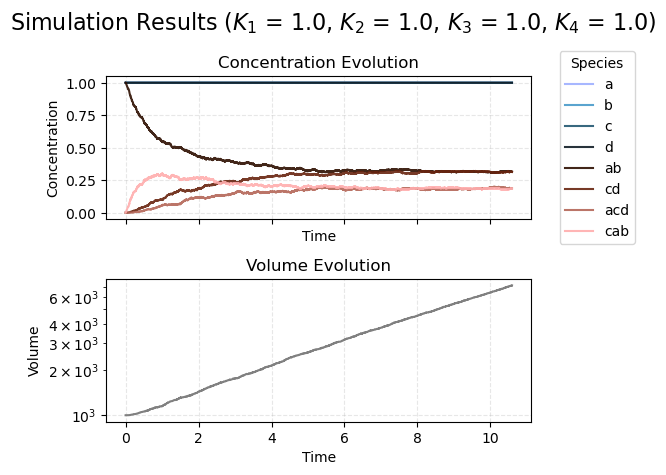

Starting [ab] = 2.0 simulation...


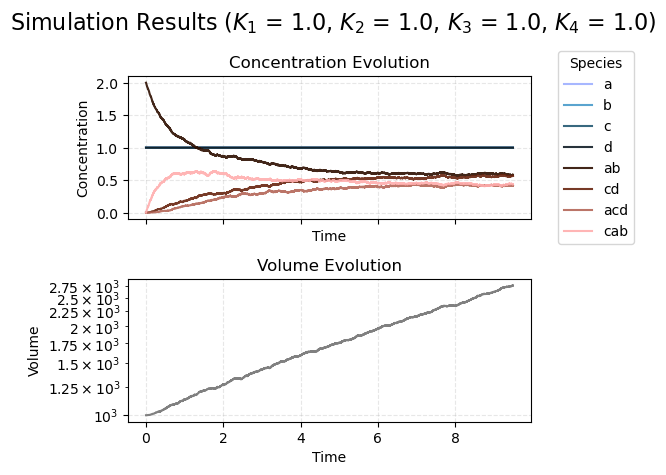

Starting [ab] = 3.0 simulation...


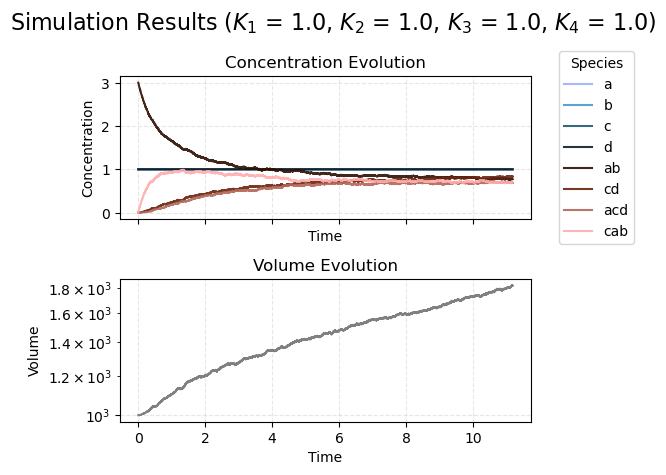

Starting [ab] = 4.0 simulation...
Criterion for stop was # of iterations


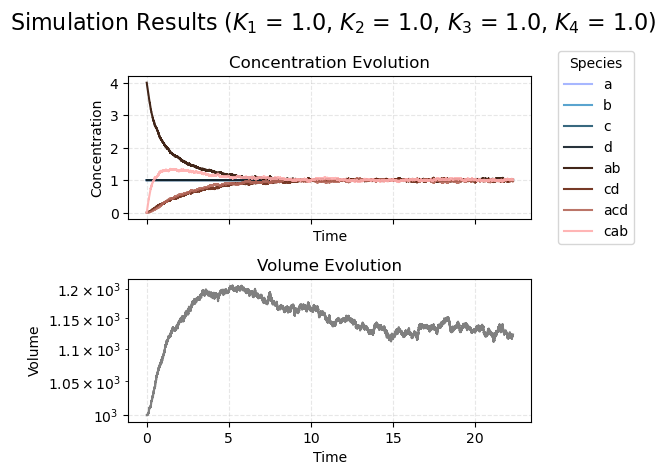

Starting [ab] = 5.0 simulation...
Criterion for stop was # of iterations


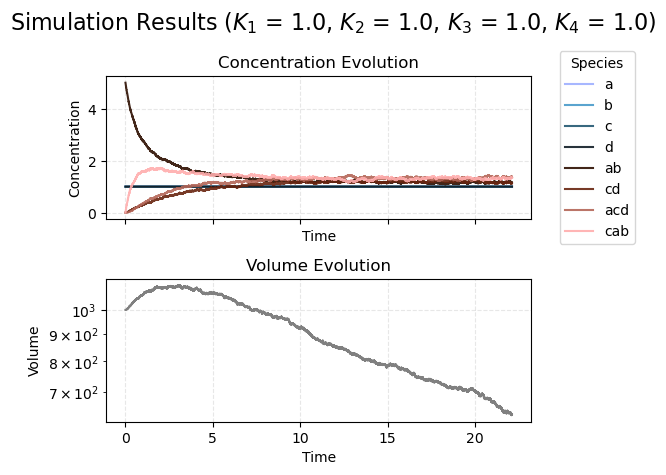

Starting [ab] = 6.0 simulation...
Criterion for stop was # of iterations


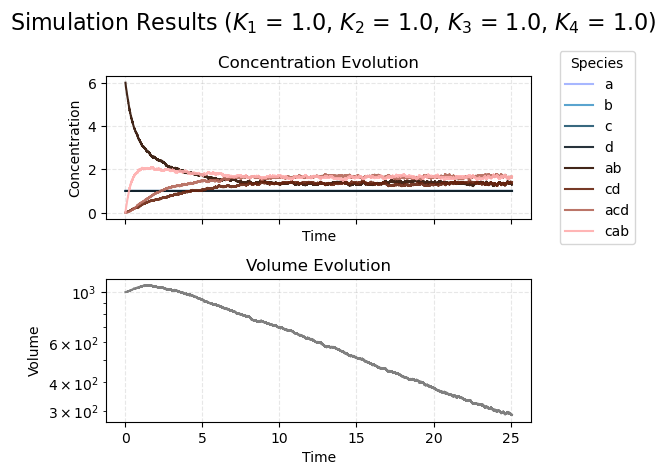

In [21]:
# 49 mins
n_iterations = 200000
method = "Protocell" # Gillespie or Deterministic
# Reaction constants:
k = [1]*8 # len(k)= # de reacciones
# Volume:
V = 1000
initial_food = [1000]*4 + [0]*4 # initial molecules number

cat_abundance = [1000,2000,3000,4000,5000,6000]

simulations={}

for initial_cat in cat_abundance:
    initial_food[4] = initial_cat
    
    print(f"Starting [ab] = {initial_cat/V} simulation...")
    abundances, times, volumes = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)
    plot(abundances, times, volumes, species)
    simulations[initial_cat/V]=(abundances, times, volumes)

### concentraciones bajas

[   1.  125.  250.  375.  500.  625.  750.  875. 1000.]
Starting [ab] = 0.001 simulation...


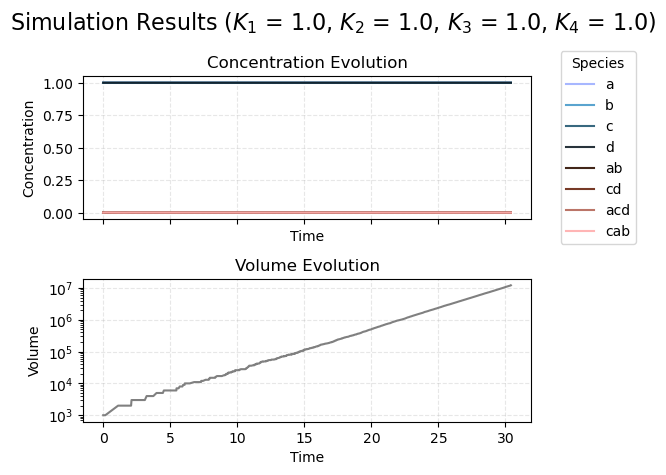

Starting [ab] = 0.125 simulation...


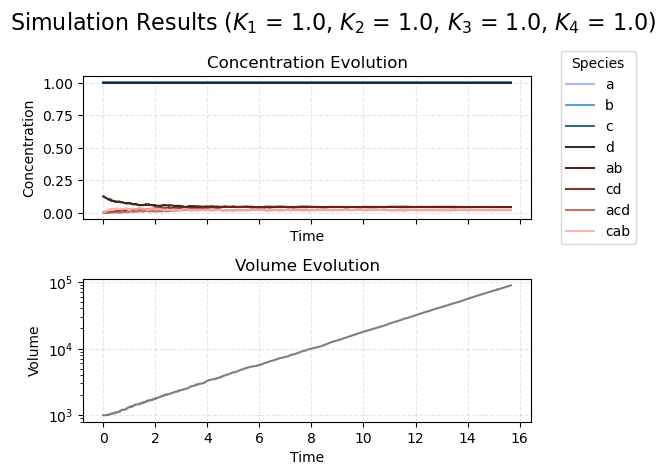

Starting [ab] = 0.25 simulation...


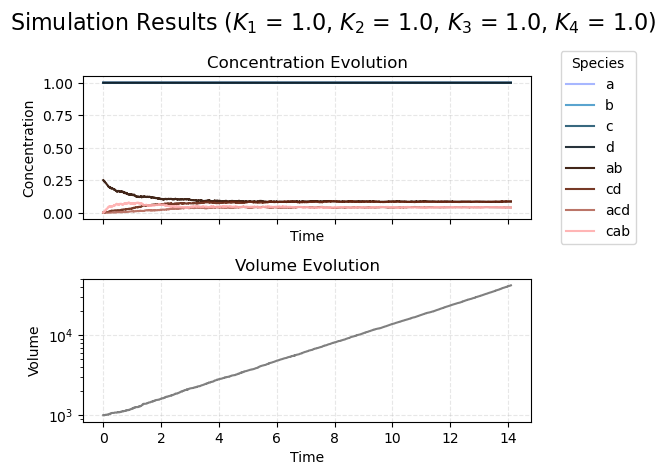

Starting [ab] = 0.375 simulation...


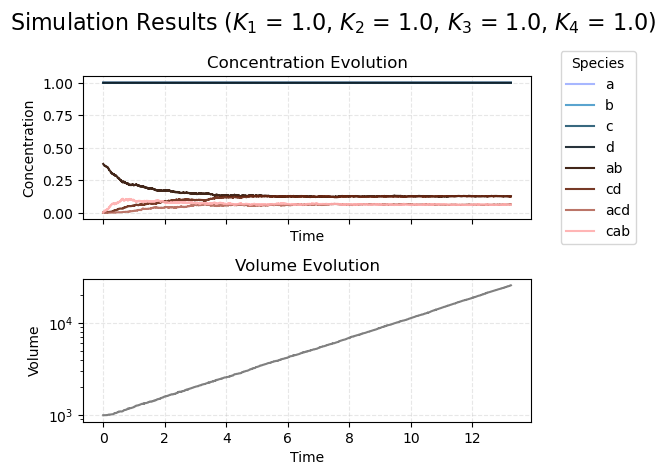

Starting [ab] = 0.5 simulation...


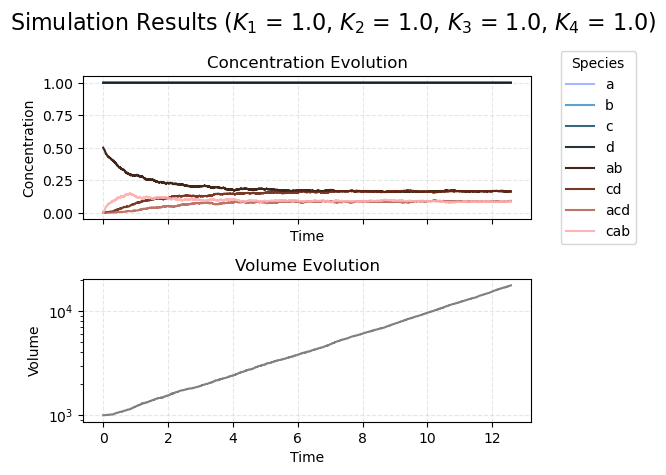

Starting [ab] = 0.625 simulation...


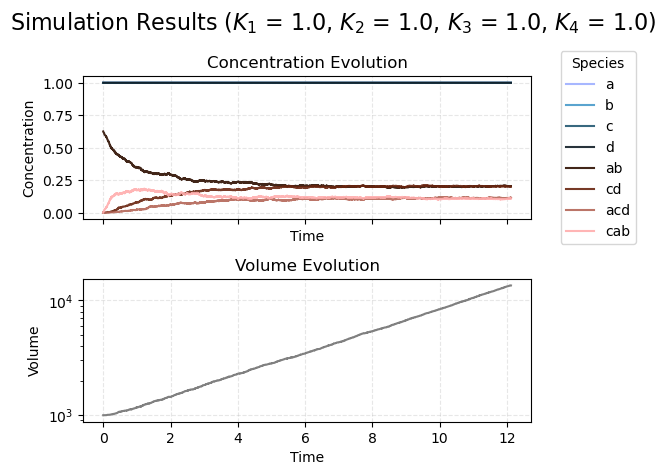

Starting [ab] = 0.75 simulation...


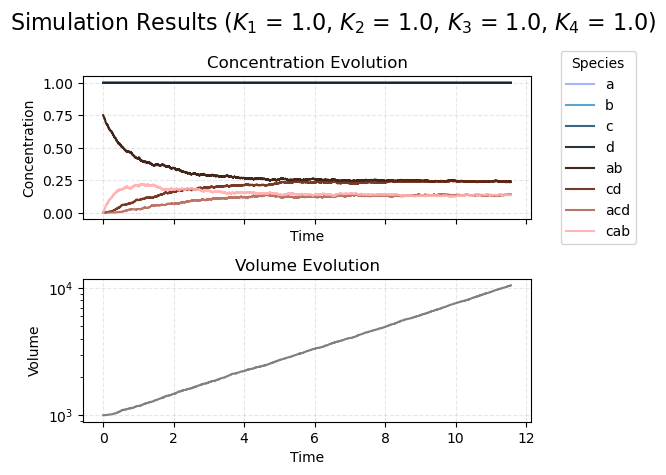

Starting [ab] = 0.875 simulation...


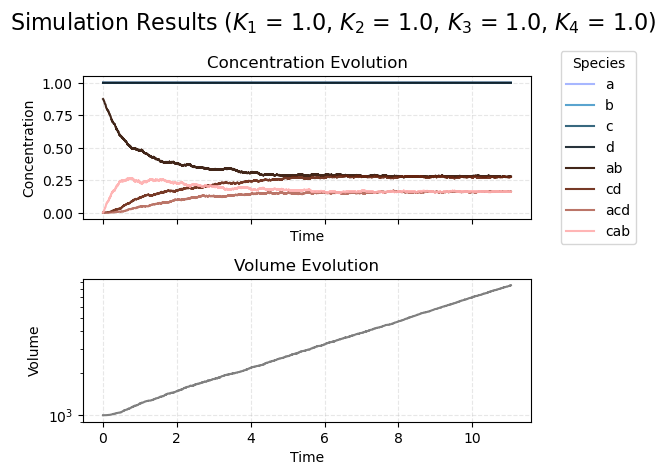

Starting [ab] = 1.0 simulation...


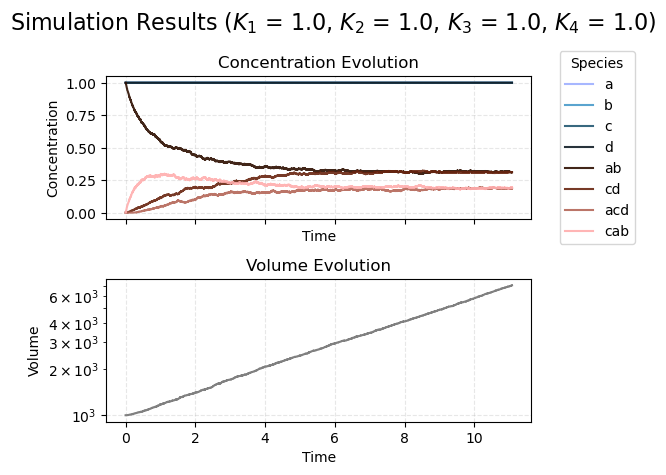

In [13]:
# 49 mins
n_iterations = 200000
method = "Protocell" # Gillespie or Deterministic
# Reaction constants:
k = [1]*8 # len(k)= # de reacciones
# Volume:
V = 1000
initial_food = [1000]*4 + [0]*4 # initial molecules number

cat_abundance = np.linspace(0,1000,9, endpoint=True)
cat_abundance[0] = 1
print(cat_abundance)
simulations = {}

for initial_cat in cat_abundance:
    initial_food[4] = initial_cat
    
    print(f"Starting [ab] = {initial_cat/V} simulation...")
    abundances, times, volumes = chemistry(method, n_iterations, f,
                                initial_food, k, V)
    plot(abundances, times, volumes, species)
    simulations[initial_cat/V]=(abundances, times, volumes)

#### save

In [23]:
with open("simulacion_barrido_ab2.txt", 'ab') as file:
    pickle.dump(simulations, file)

In [26]:
with open("simulacion_barrido_ab.txt", "rb") as file:
    simulations_results = pickle.load(file)
    
with open("simulacion_barrido_ab2.txt", "rb") as file:
    simulations_results = simulations_results | pickle.load(file)

In [27]:
print(simulations_results.keys())

dict_keys([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 0.001, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875])


## ajuste a log

In [16]:
from numpy.polynomial.polynomial import polyfit

def get_alpha(volumes, times):
    # 1. Transform the data
    log_v = np.log(volumes)
    
    # 2. Perform linear regression: log(V) = log(A) + m * t
    coefficients = polyfit(times, log_v, 1)
    
    # Extract the intercept (log(A)) and slope (m)
    log_A_fit = coefficients[0]
    m_fit = coefficients[1] 
    
    # 3. Calculate the scaling constant A
    A_fit = np.exp(log_A_fit)
    
    
    # --- R-SQUARED CALCULATION ---
    
    # a) Calculate the predicted log(V) values
    # log(V)_predicted = log(A)_fit + m_fit * t
    log_v_predicted = log_A_fit + m_fit * times
    
    # b) Calculate the Mean of the actual log(V) data
    log_v_mean = np.mean(log_v)
    
    # c) Calculate Sum of Squares of Residuals (SS_res)
    # The sum of the squared differences between actual y and predicted y
    SS_res = np.sum((log_v - log_v_predicted)**2)
    
    # d) Calculate Total Sum of Squares (SS_tot)
    # The sum of the squared differences between actual y and mean y
    SS_tot = np.sum((log_v - log_v_mean)**2)
    
    # e) Calculate R-squared
    R_squared = 1 - (SS_res / SS_tot)
    
    # -----------------------------
    
    print(f"Regression completed. Fitted Scaling Constant A: {A_fit:.3f}")
    print(f"Fitted exponential rate m (alpha): {m_fit:.3f}")
    print(f"Coefficient of Determination (R^2): {R_squared:.4f}")
    
    def function_v(t_new):
        if t_new < 0:
            raise ValueError("Time cannot be negative")
        
        # *** CRITICAL CORRECTION HERE: USE EXPONENTIAL FUNCTION ***
        predicted_V = A_fit * np.exp(m_fit * t_new) 
        # V(t) = A * e^(m * t)
        return predicted_V

    return function_v


In [16]:
def plot_ajuste(volumes,times):
        fig, ax = plt.subplots()

        ax.plot(times, volumes, 
                label=fr'Simulation data'
        )


        func = get_alpha(volumes[1:], times[1:])

        volume_predicted = []

        for t in times[1:]:
                volume_predicted.append(func(t))

        volume_predicted = np.array(volume_predicted)

        ax.plot(times[1:], volume_predicted, 
                label=fr'Fit'
        )
        

        ax.set_xlabel("Time")
        ax.set_ylabel("Volume")

        ax.grid(True, which="both", ls="--", alpha=0.5)
        ax.legend()

        plt.tight_layout()
        plt.show()
        print("Plot generated successfully.")

[ab]0 = 1.0
Regression completed. Fitted Scaling Constant A: 1018.439
Fitted exponential rate m (alpha): 0.174
Coefficient of Determination (R^2): 0.9997


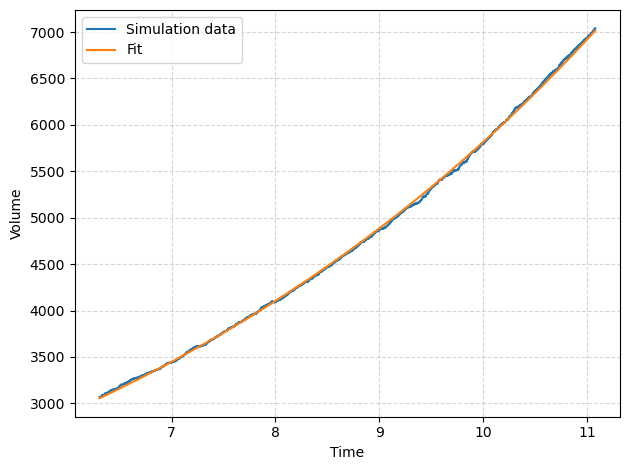

Plot generated successfully.
[ab]0 = 2.0
Regression completed. Fitted Scaling Constant A: 1079.499
Fitted exponential rate m (alpha): 0.099
Coefficient of Determination (R^2): 0.9980


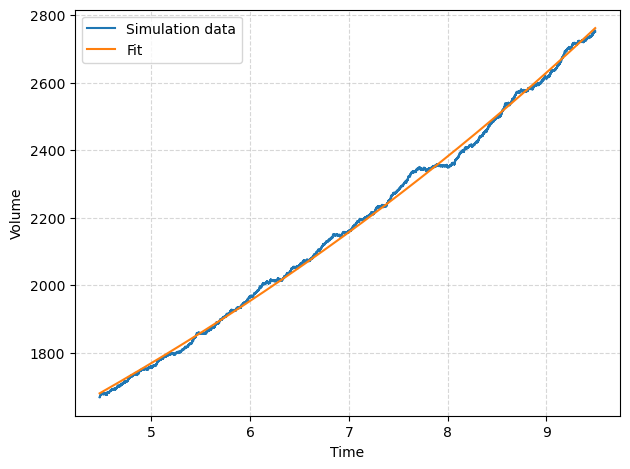

Plot generated successfully.
[ab]0 = 3.0
Regression completed. Fitted Scaling Constant A: 1173.023
Fitted exponential rate m (alpha): 0.039
Coefficient of Determination (R^2): 0.9957


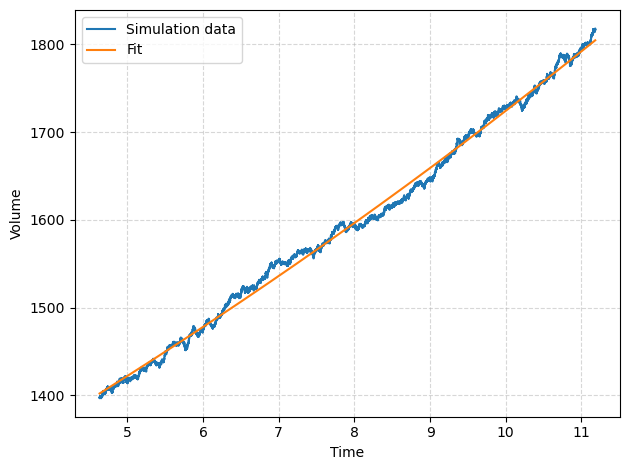

Plot generated successfully.
[ab]0 = 4.0
Regression completed. Fitted Scaling Constant A: 1184.929
Fitted exponential rate m (alpha): -0.003
Coefficient of Determination (R^2): 0.6079


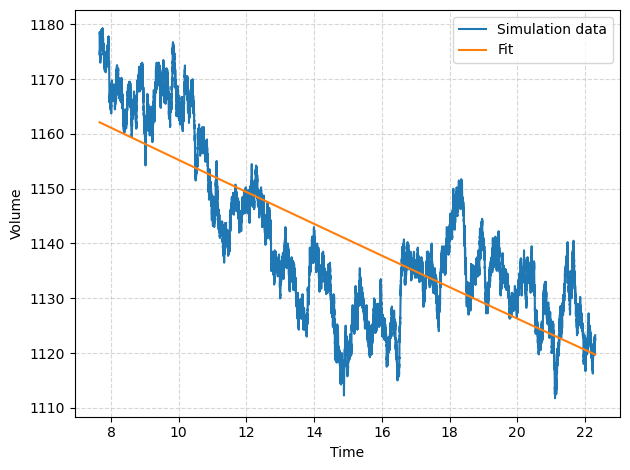

Plot generated successfully.
[ab]0 = 5.0
Regression completed. Fitted Scaling Constant A: 1234.648
Fitted exponential rate m (alpha): -0.029
Coefficient of Determination (R^2): 0.9905


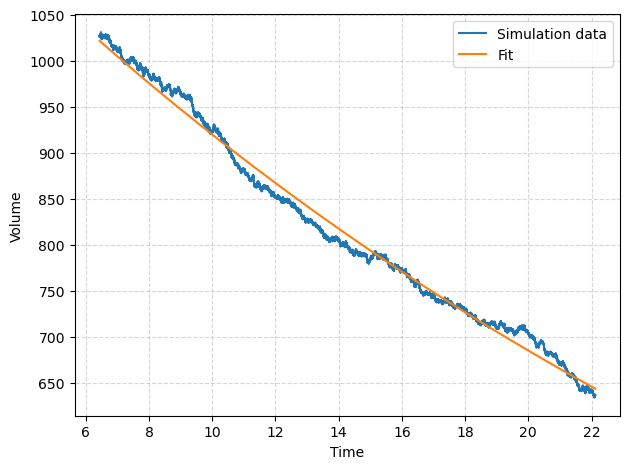

Plot generated successfully.
[ab]0 = 6.0
Regression completed. Fitted Scaling Constant A: 1255.455
Fitted exponential rate m (alpha): -0.060
Coefficient of Determination (R^2): 0.9991


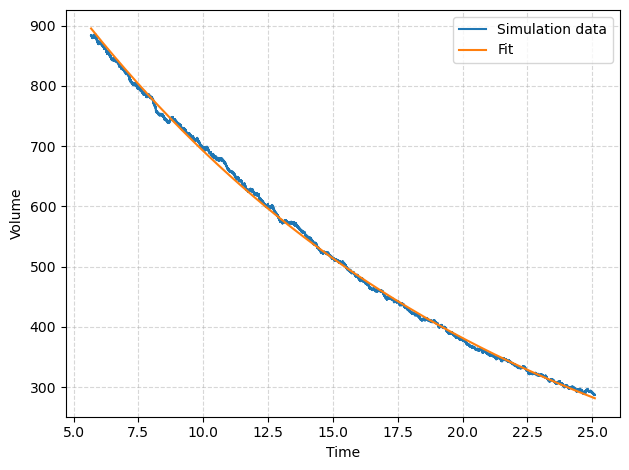

Plot generated successfully.
[ab]0 = 0.001
Regression completed. Fitted Scaling Constant A: 1305.146
Fitted exponential rate m (alpha): 0.300
Coefficient of Determination (R^2): 0.9999


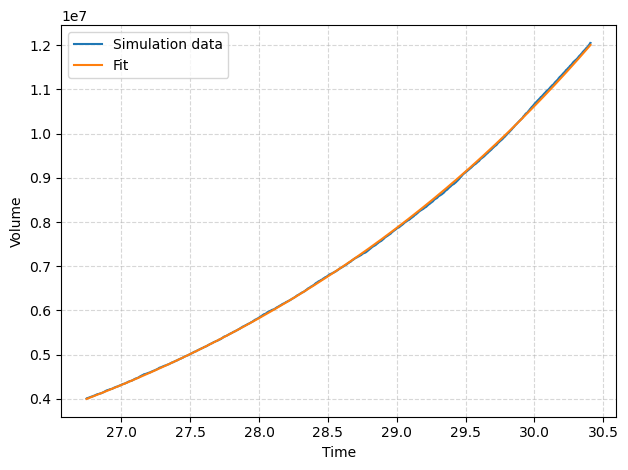

Plot generated successfully.
[ab]0 = 0.125
Regression completed. Fitted Scaling Constant A: 1075.663
Fitted exponential rate m (alpha): 0.282
Coefficient of Determination (R^2): 0.9999


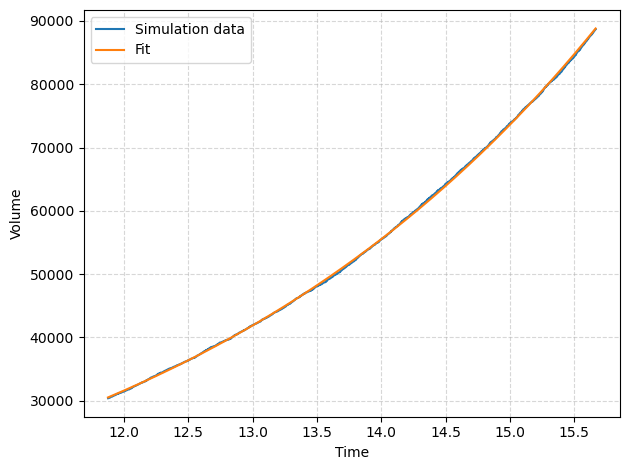

Plot generated successfully.
[ab]0 = 0.25
Regression completed. Fitted Scaling Constant A: 893.831
Fitted exponential rate m (alpha): 0.272
Coefficient of Determination (R^2): 0.9998


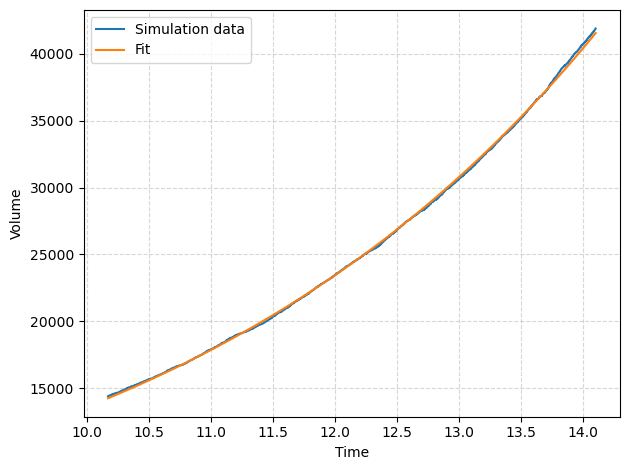

Plot generated successfully.
[ab]0 = 0.375
Regression completed. Fitted Scaling Constant A: 918.389
Fitted exponential rate m (alpha): 0.251
Coefficient of Determination (R^2): 0.9998


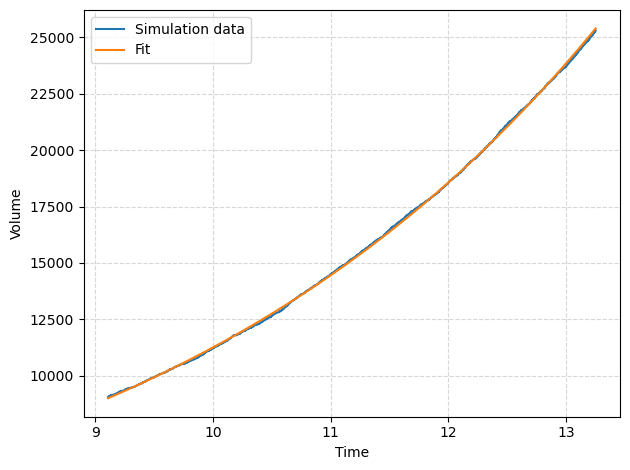

Plot generated successfully.
[ab]0 = 0.5
Regression completed. Fitted Scaling Constant A: 908.701
Fitted exponential rate m (alpha): 0.236
Coefficient of Determination (R^2): 0.9998


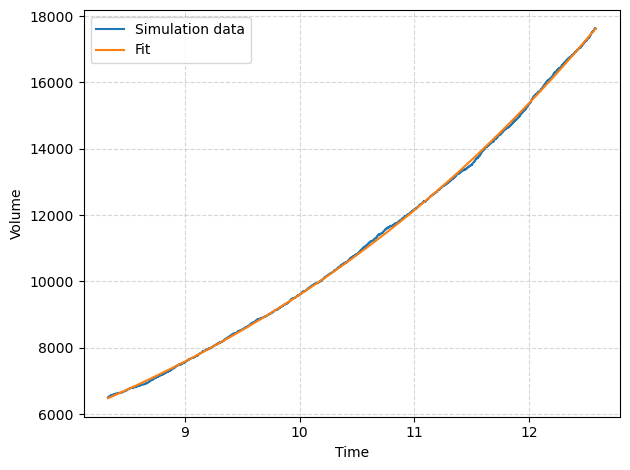

Plot generated successfully.
[ab]0 = 0.625
Regression completed. Fitted Scaling Constant A: 883.847
Fitted exponential rate m (alpha): 0.225
Coefficient of Determination (R^2): 0.9998


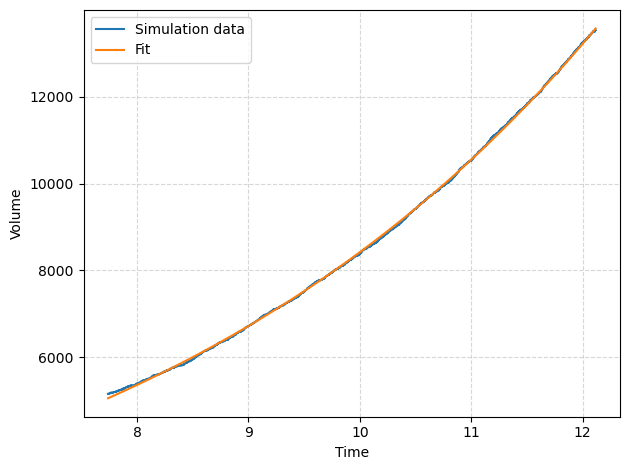

Plot generated successfully.
[ab]0 = 0.75
Regression completed. Fitted Scaling Constant A: 934.399
Fitted exponential rate m (alpha): 0.209
Coefficient of Determination (R^2): 0.9999


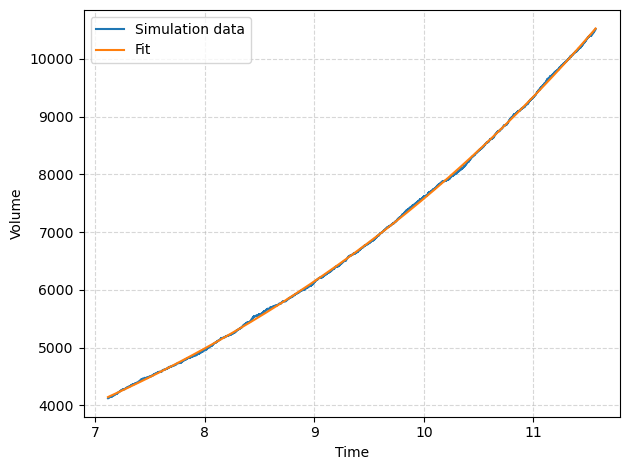

Plot generated successfully.
[ab]0 = 0.875
Regression completed. Fitted Scaling Constant A: 994.283
Fitted exponential rate m (alpha): 0.195
Coefficient of Determination (R^2): 0.9998


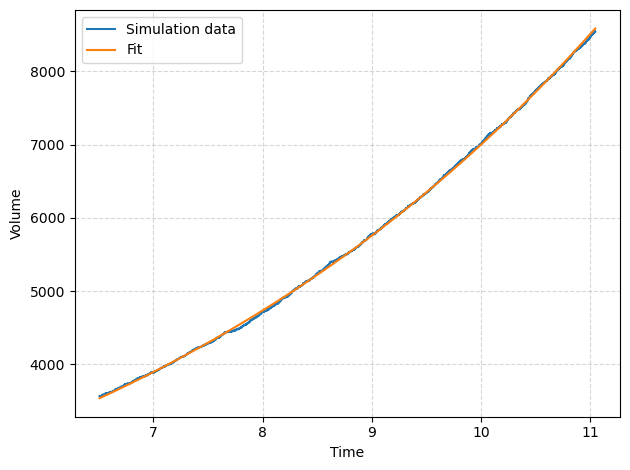

Plot generated successfully.


In [84]:
for conc in simulations_results.keys():
    abundances, times, volumes = simulations_results[conc]
    print(fr"[ab]0 = {conc}")
    plot_ajuste(volumes[round(len(volumes)/3):], times[round(len(volumes)/3):])

## mejorado

In [13]:
def get_alpha_global(results: dict):
    # Initialize a list of lists/tuples to hold the data temporarily
    data = [] 
    
    for conc, (species, times, volumes) in results.items(): 
        
        times = np.array(times)
        volumes = np.array(volumes)
        
            
        # Use data points from index len(x)/2 onwards for a better fit
        log_v = np.log(volumes[round(len(volumes)/3):])
        t_subset = times[round(len(times)/3):]
        
        # 2. Perform linear regression
        coefficients = polyfit(t_subset, log_v, 1)
        log_A_fit = coefficients[0]
        m_fit = coefficients[1] # alpha
        A_fit = np.exp(log_A_fit)
        
        # --- R-SQUARED CALCULATION (Use the same logic as before, but with subsets) ---
        log_v_predicted = log_A_fit + m_fit * t_subset
        log_v_mean = np.mean(log_v)
        SS_res = np.sum((log_v - log_v_predicted)**2)
        SS_tot = np.sum((log_v - log_v_mean)**2)
        R_squared = 1 - (SS_res / SS_tot)
        
        # Append the calculated metrics to the data list
        data.append({
            'Initial [AB]': conc,
            'Alpha': m_fit,
            'Scaling Const. (A)': A_fit,
            'R^2': R_squared
        })
    
    # Convert the list of dictionaries into a DataFrame
    df_fit = pd.DataFrame(data)
    return df_fit

In [86]:
fit = get_alpha_global(simulations_results)
print(fit.to_string(index=False, float_format="%.4f"))

 Initial [AB]   Alpha  Scaling Const. (A)    R^2
       1.0000  0.1742           1018.4400 0.9997
       2.0000  0.0989           1079.4970 0.9980
       3.0000  0.0385           1173.0221 0.9957
       4.0000 -0.0025           1184.9299 0.6079
       5.0000 -0.0295           1234.6486 0.9905
       6.0000 -0.0596           1255.4543 0.9991
       0.0010  0.3001           1305.1517 0.9999
       0.1250  0.2817           1075.6596 0.9999
       0.2500  0.2723            893.8374 0.9998
       0.3750  0.2505            918.3925 0.9998
       0.5000  0.2357            908.7035 0.9998
       0.6250  0.2254            883.8560 0.9998
       0.7500  0.2093            934.3968 0.9999
       0.8750  0.1951            994.2865 0.9998


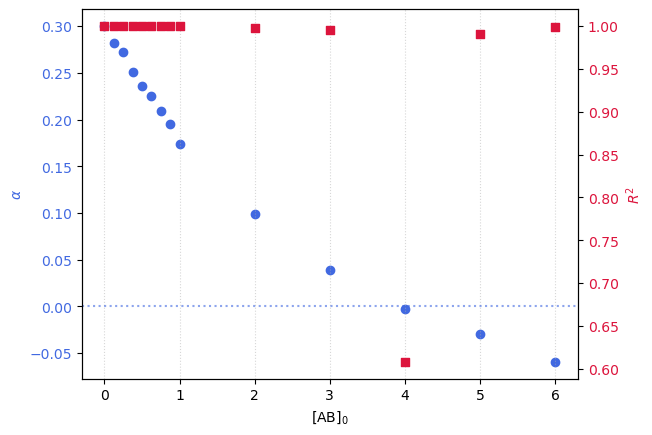

In [89]:
fig, ax1 = plt.subplots()

ax1.set_xlabel(r'$[\text{AB}]_0$') 
ax1.set_ylabel(r'$\alpha$', color="royalblue")
ax1.scatter(fit['Initial [AB]'], fit['Alpha'], 
            color="royalblue", marker='o')

ax1.tick_params(axis='y', labelcolor="royalblue")
ax1.grid(True, linestyle=':', alpha=0.5, which='both', axis='x')
ax1.axhline(y= 0, color= "royalblue", alpha= 0.6, linestyle=":")

ax2 = ax1.twinx()  

ax2.set_ylabel(r'$R^2$', color="crimson")  
ax2.scatter(fit['Initial [AB]'], fit['R^2'], 
            color="crimson", marker='s')
ax2.tick_params(axis='y', labelcolor="crimson")


## curiosas: vol no crece

La probabilidad total es 0 !!


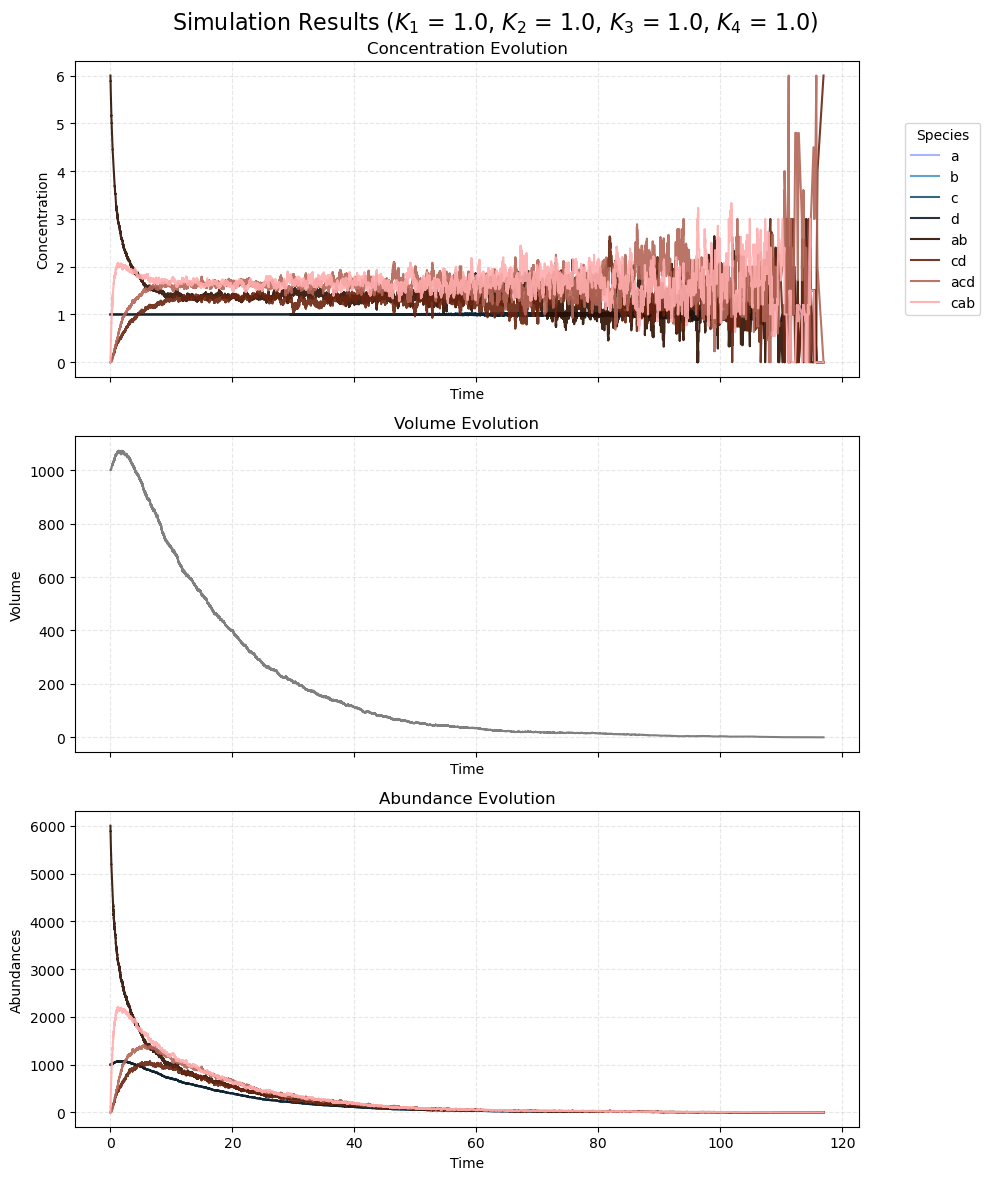

In [32]:
# este va bien
n_iterations = 1e100
method = "Protocell" # Gillespie or Deterministic
# Reaction constants:
k = [1]*8 # len(k)= # de reacciones
# Volume:
V = 1000
initial_food = [1000]*4 + [6000] + [0]*3 # initial molecules number

abundances, times, V = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)

plot(abundances, times, V)

La probabilidad total es 0 !!


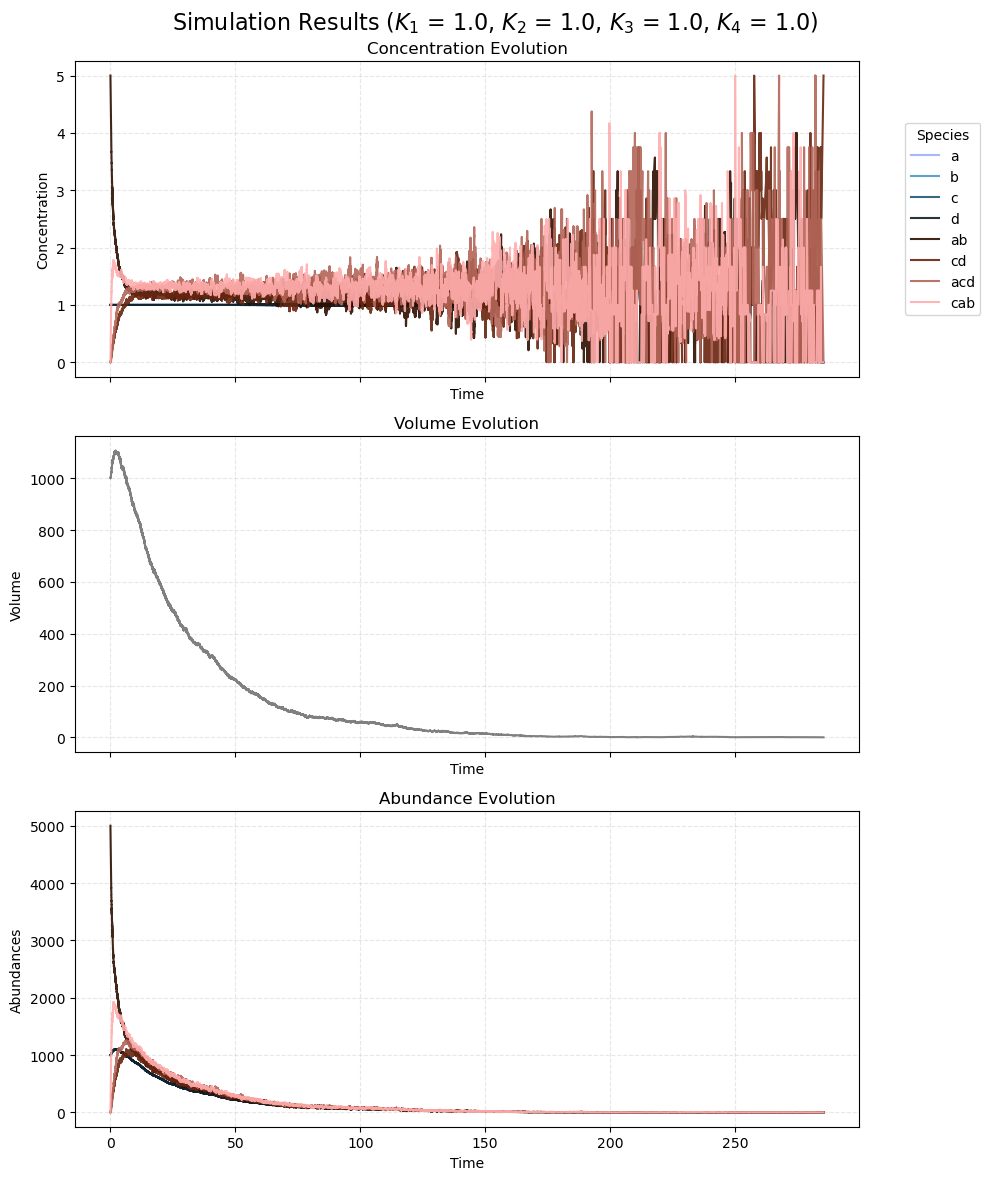

In [33]:
# este va bien
n_iterations = 1e100
method = "Protocell" # Gillespie or Deterministic
# Reaction constants:
k = [1]*8 # len(k)= # de reacciones
# Volume:
V = 1000
initial_food = [1000]*4 + [5000] + [0]*3 # initial molecules number

abundances, times, V = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)

plot(abundances, times, V)

In [13]:
# este va bien
n_iterations = 3e5
method = "Protocell" # Gillespie or Deterministic
# Reaction constants:
k = [1]*8 # len(k)= # de reacciones
# Volume:
V = 1000
initial_food = [1000]*4 + [3000] + [0]*3 # initial molecules number

abundances, times, V = chemistry(method, n_iterations, reactions,
                                initial_food, k, V, threshold= 0)


Criterion for stop was # of iterations


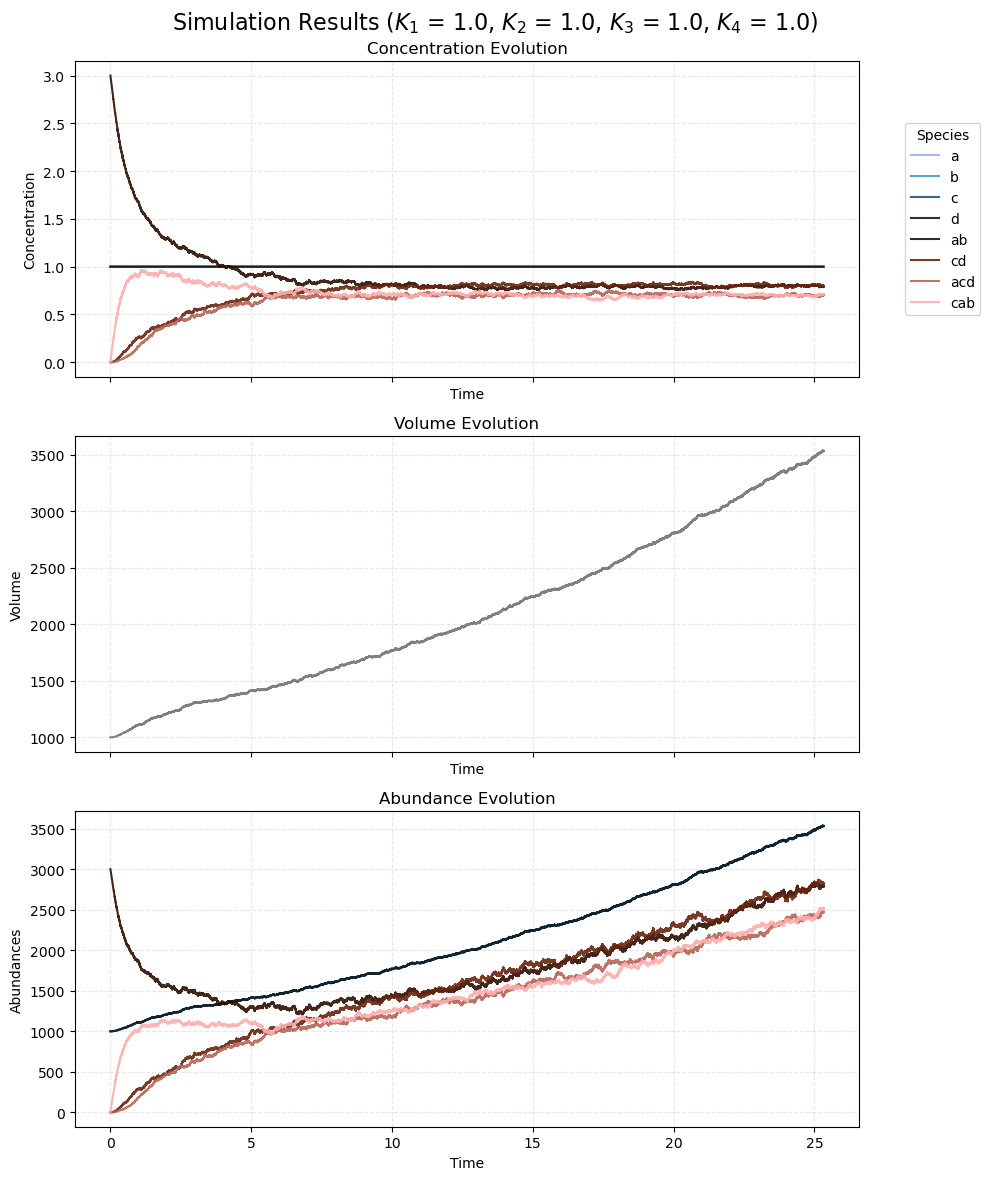

In [14]:

plot(abundances, times, V, species)

# condiciones iniciales

105
395


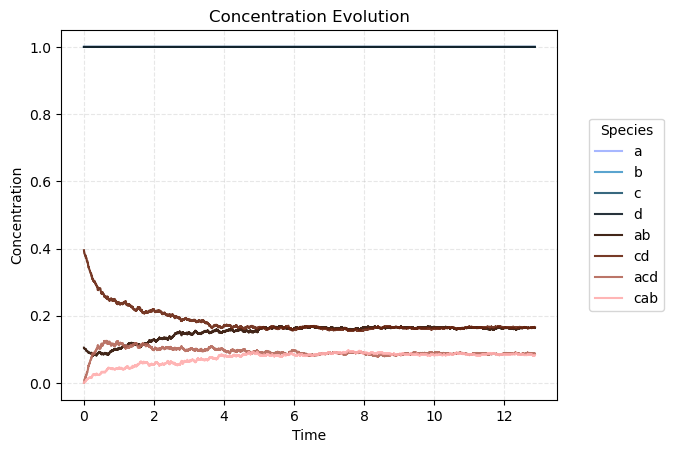

171
329


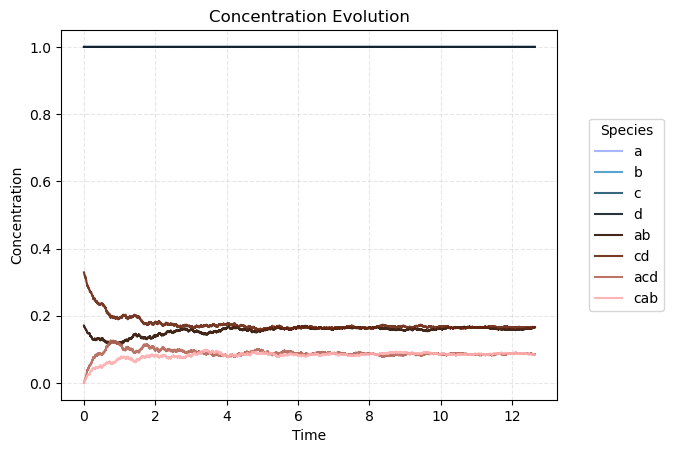

218
282


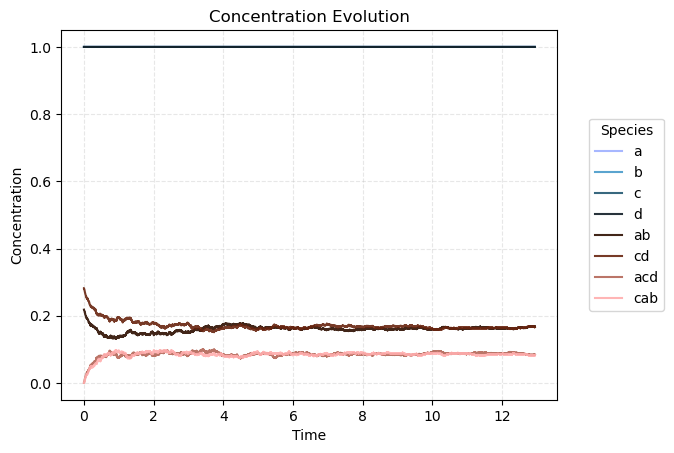

13
487


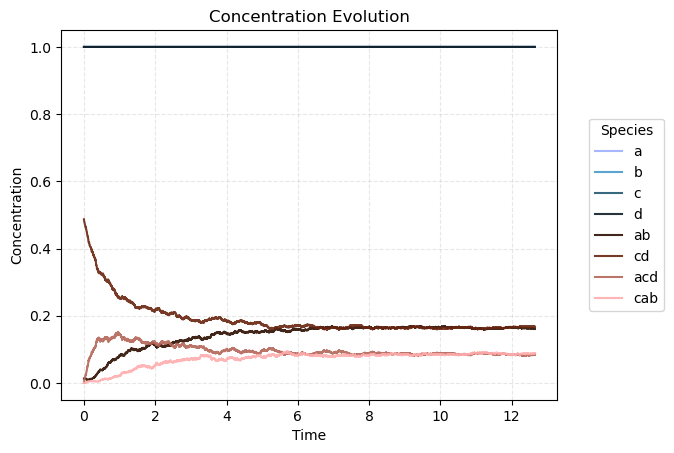

361
139


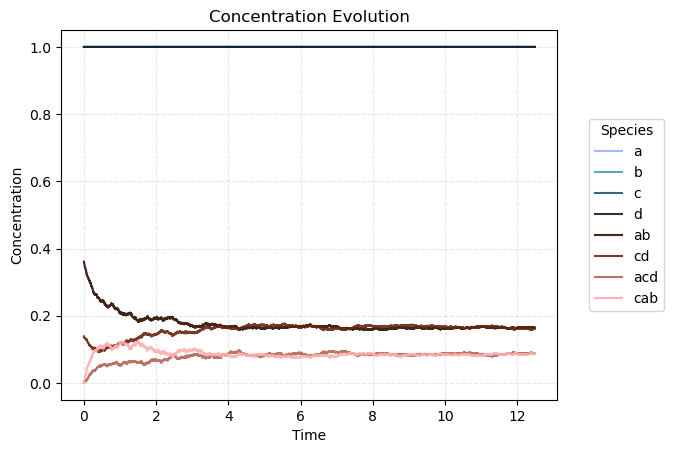

114
886


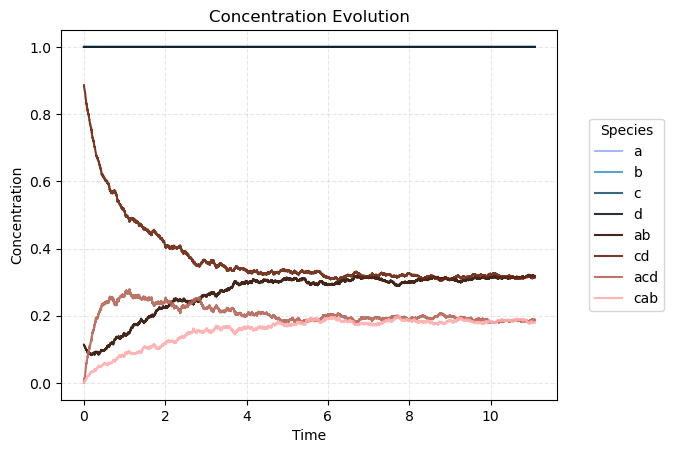

797
203


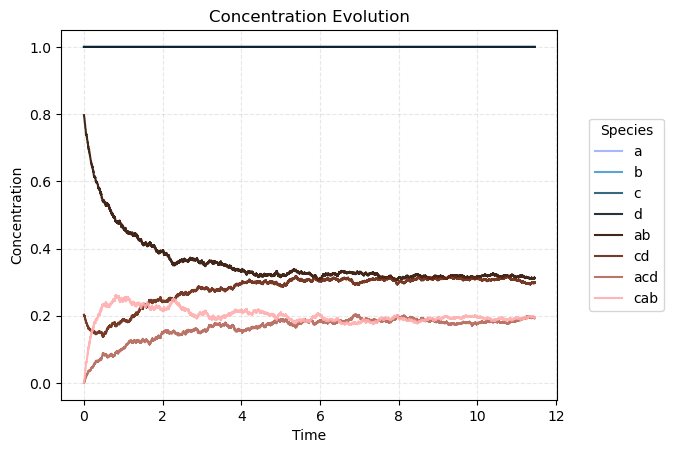

860
140


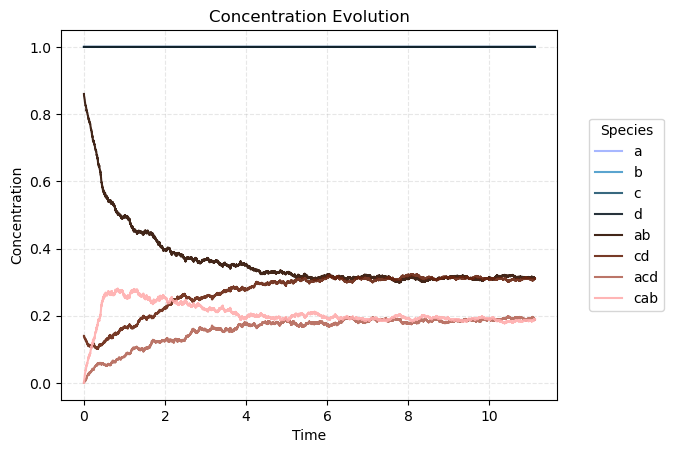

737
263


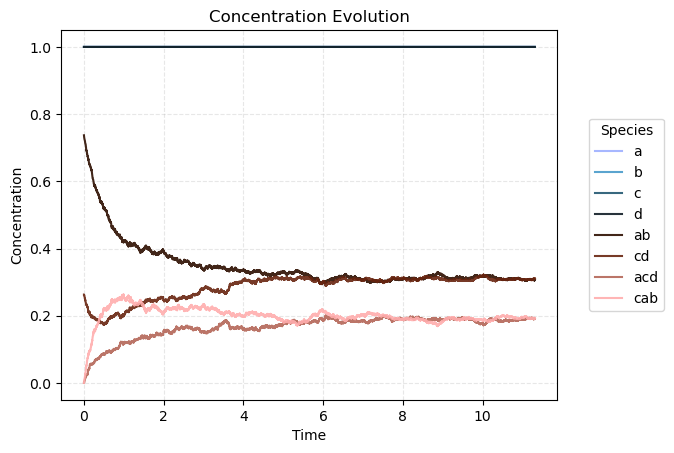

529
471


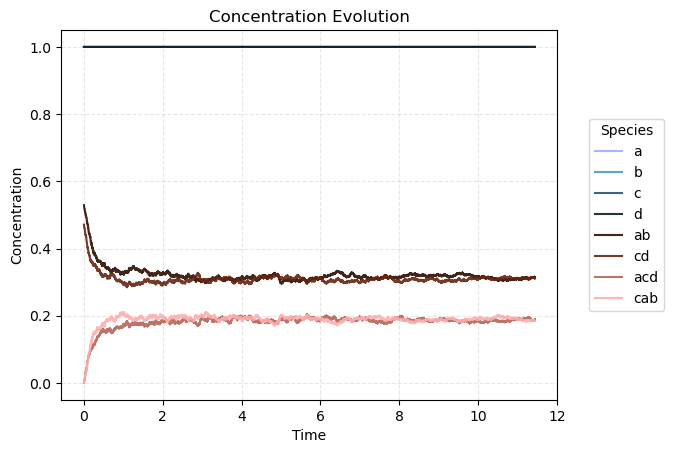

1754
246


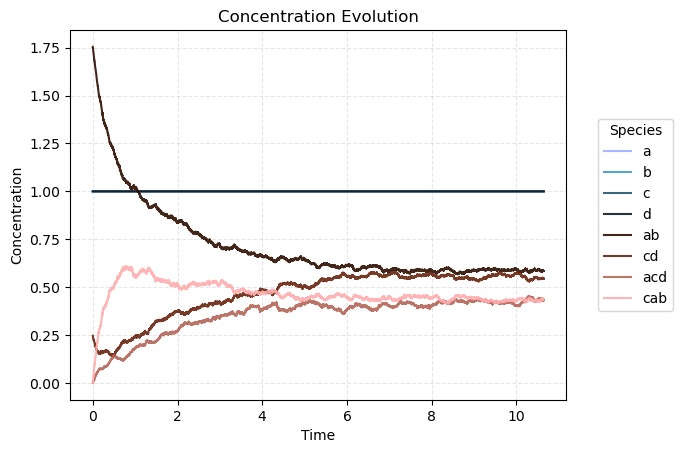

1546
454


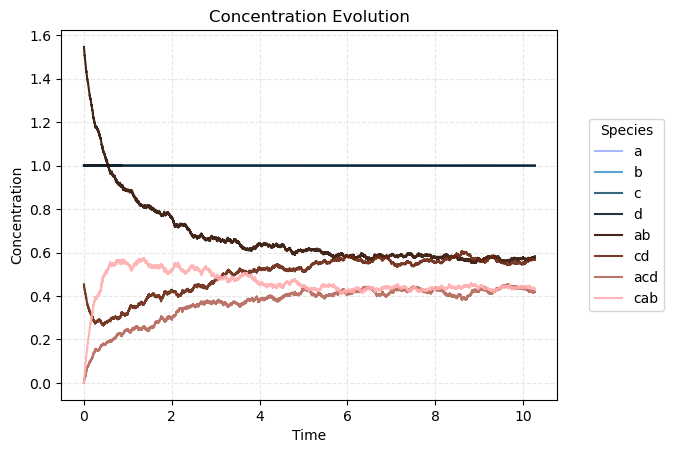

1885
115


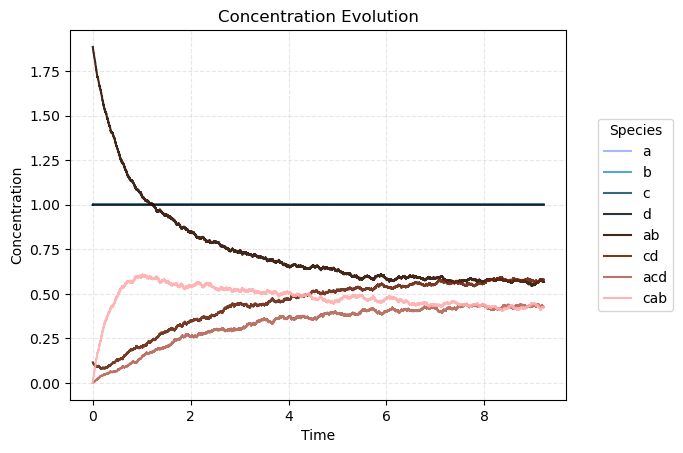

1986
14


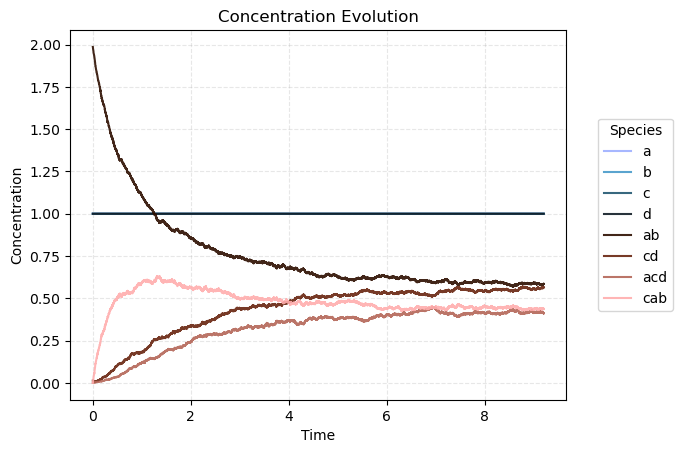

1834
166


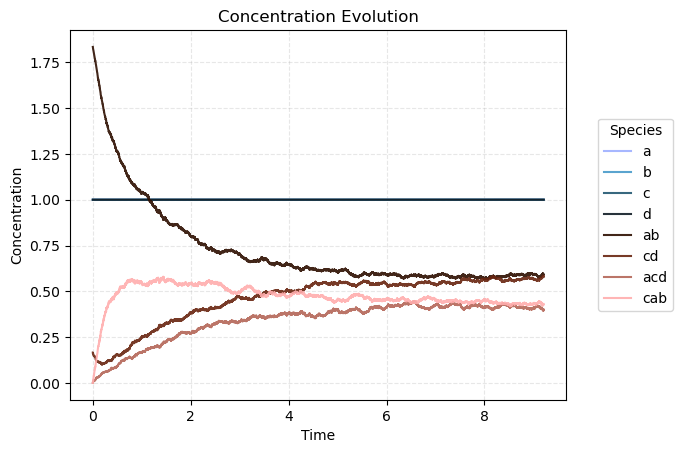

In [12]:
from random import random
n_iterations = 1e5
method = "Protocell" # Gillespie or Deterministic
# Reaction constants:
k = [1]*8 # len(k)= # de reacciones
# Volume:
V = 1000
initial_food = [1000]*4 + [0]*4 # initial molecules number

concentrations = [0.5,1,2]

for i in concentrations:
    total_abundance = i * V
    for j in range(5):
        random_number = random()
        initial_food[4] = round(random_number * total_abundance)
        initial_food[5] = round(total_abundance - (random_number * total_abundance))
        print(initial_food[4])
        print(initial_food[5])
        abundances, times, volumes = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)
        
        plot_concentration(abundances, times, volumes)

## catalizador mínimo

1


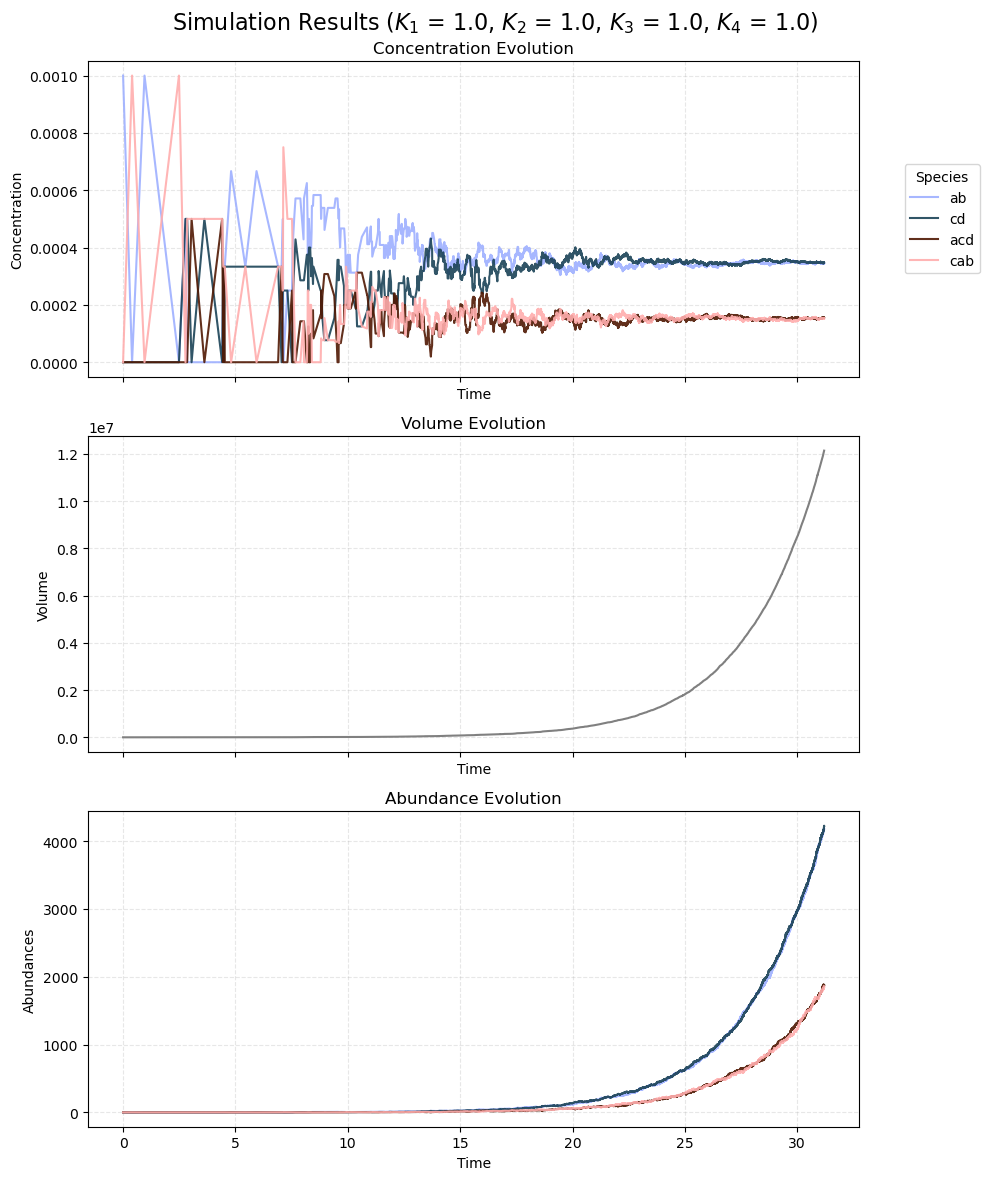

11


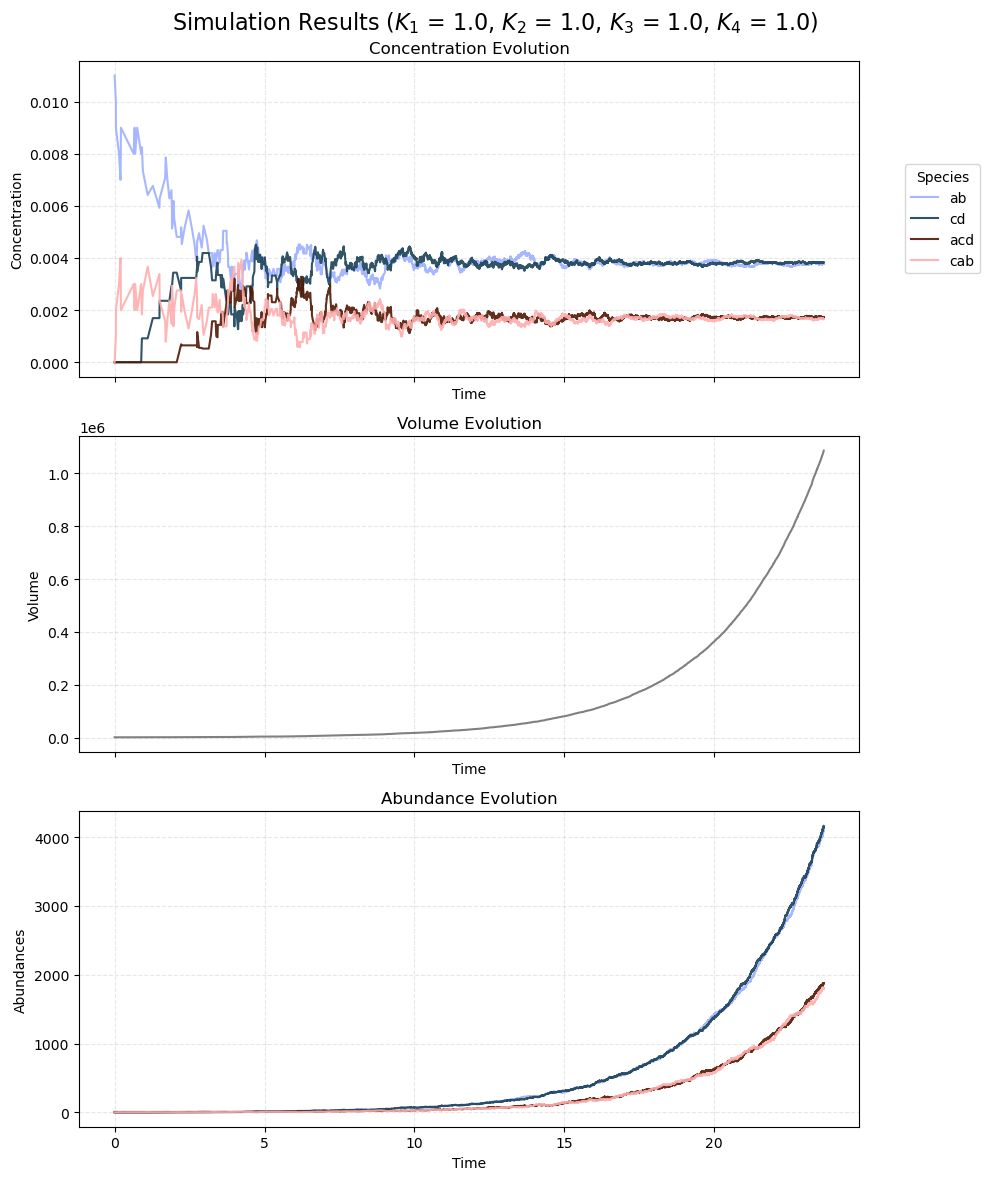

21


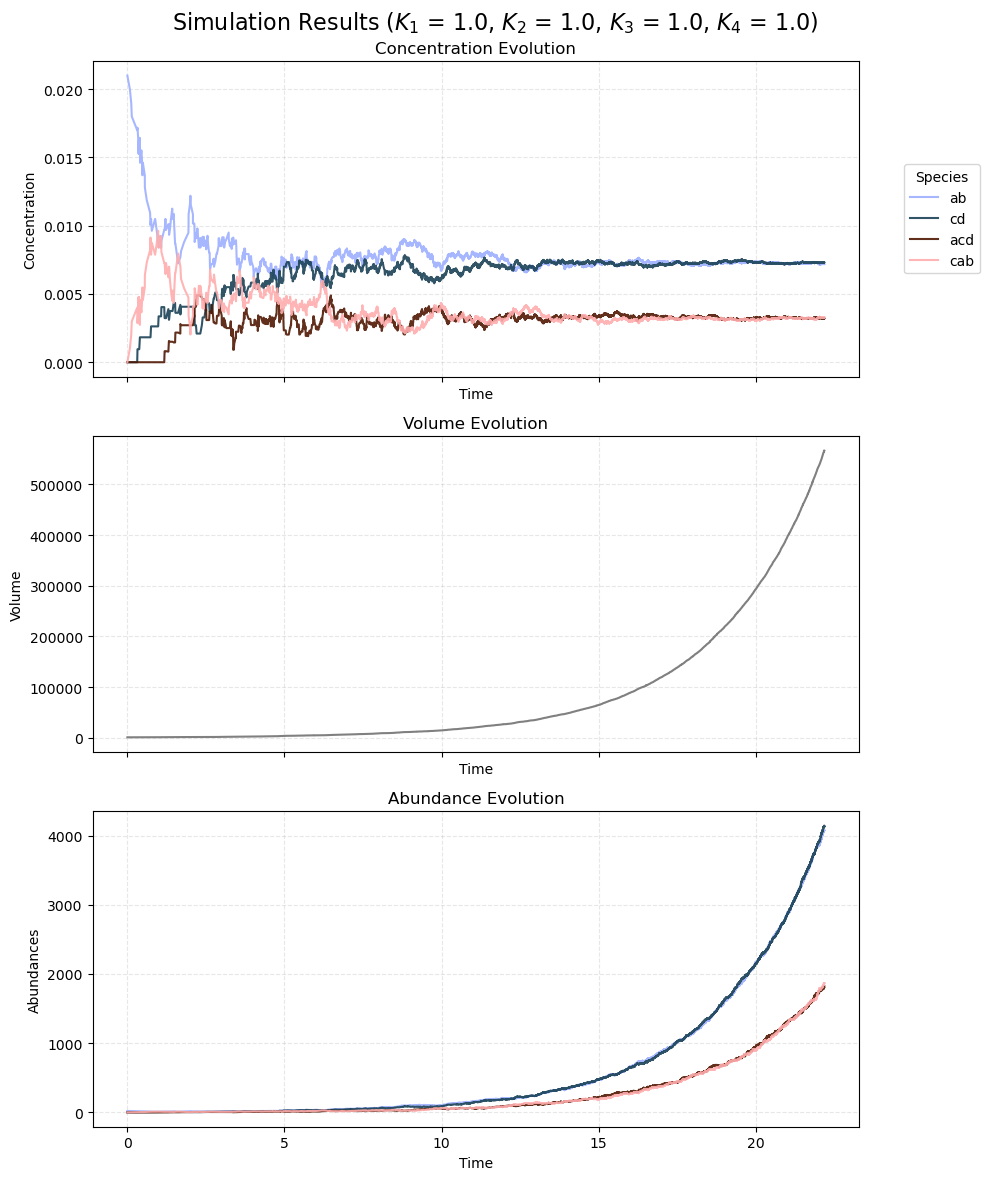

31


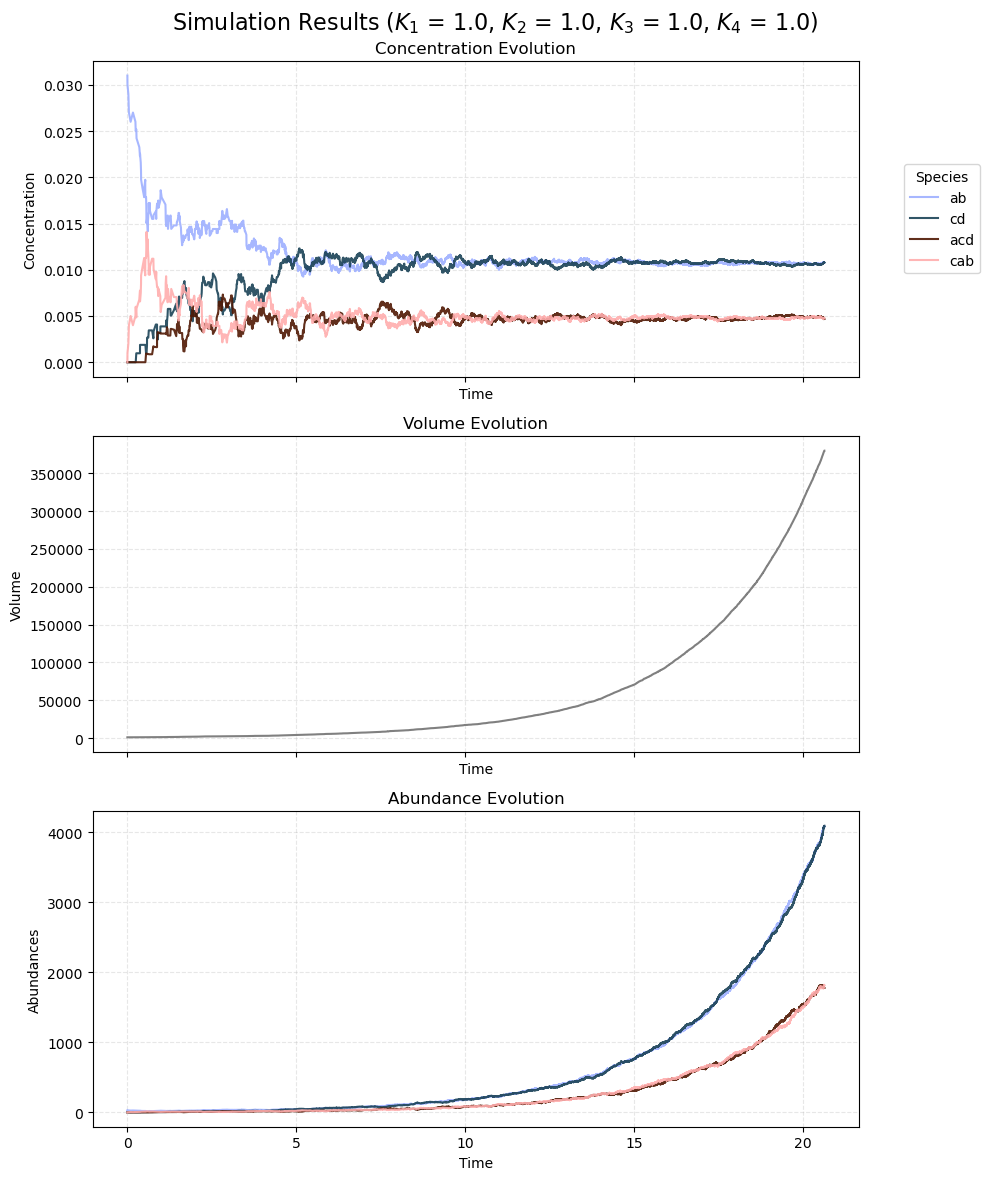

41


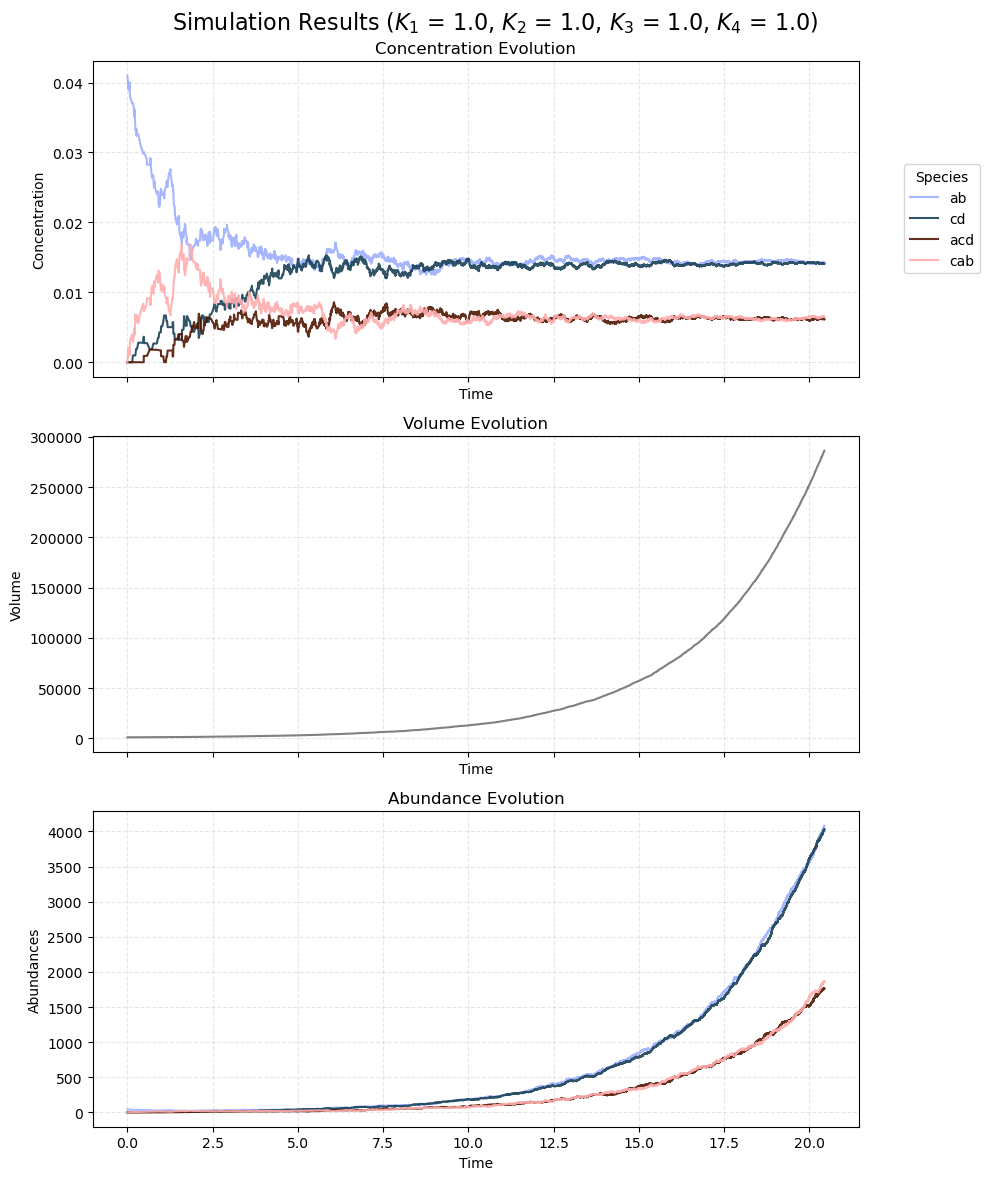

51


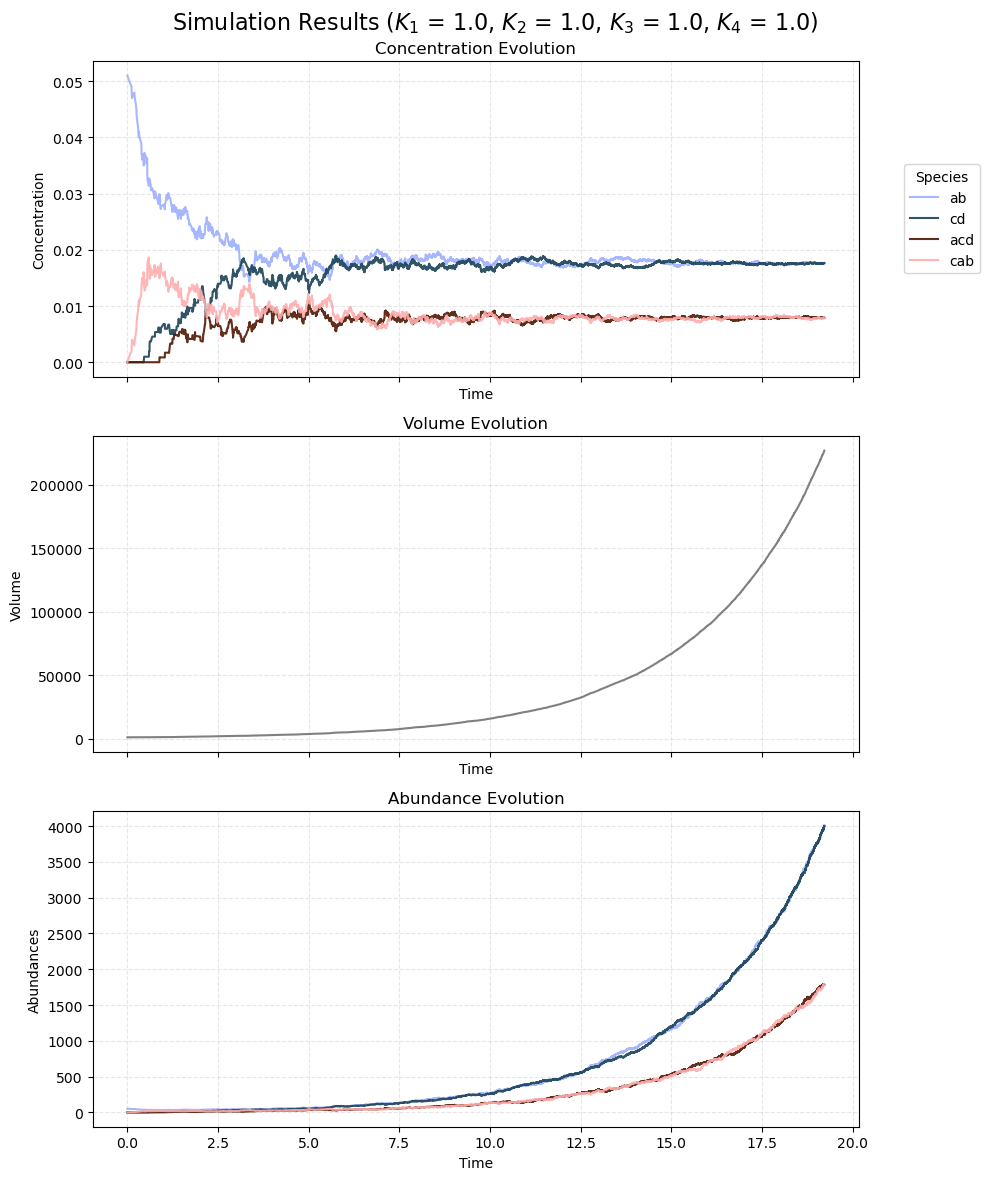

61


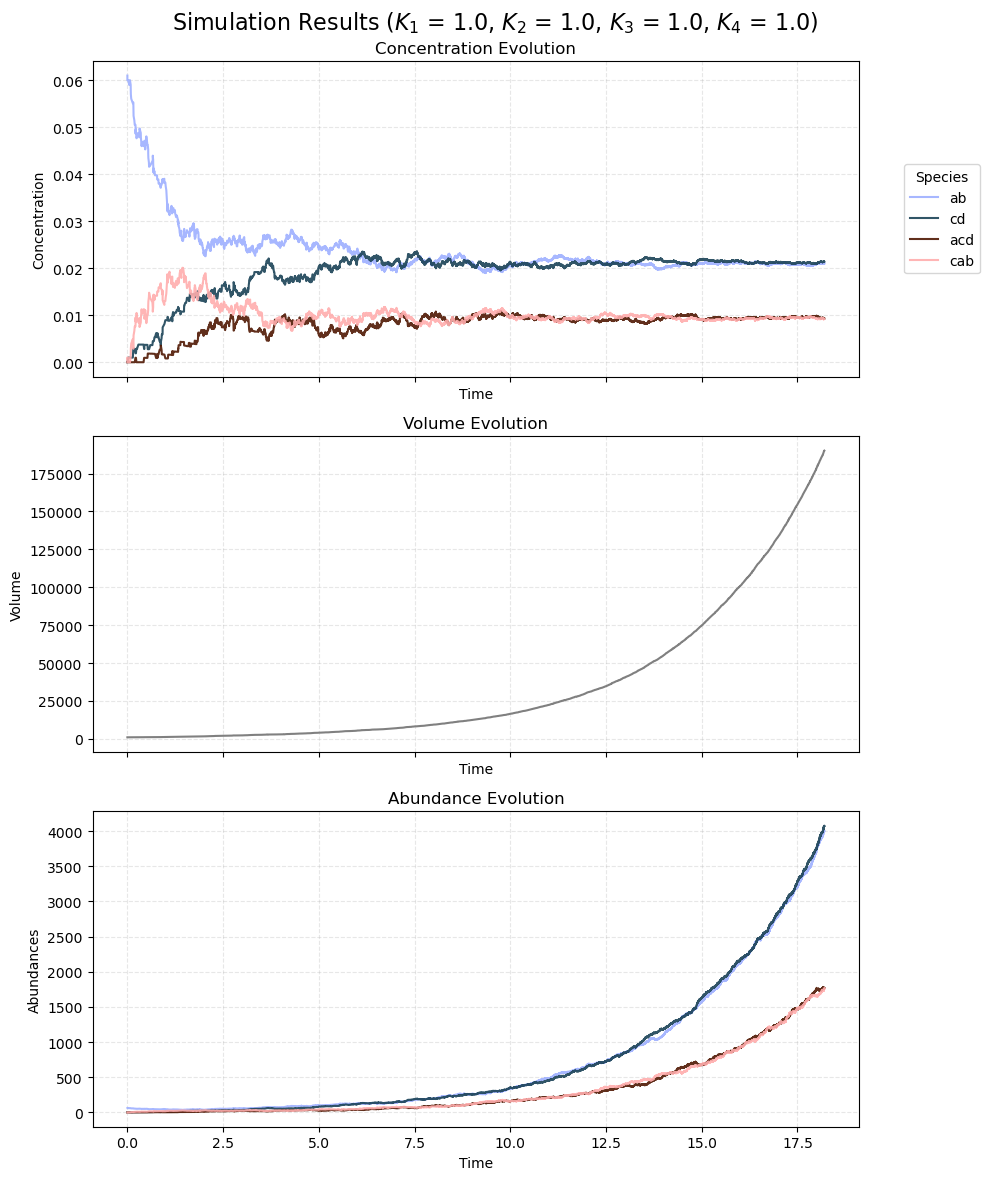

71


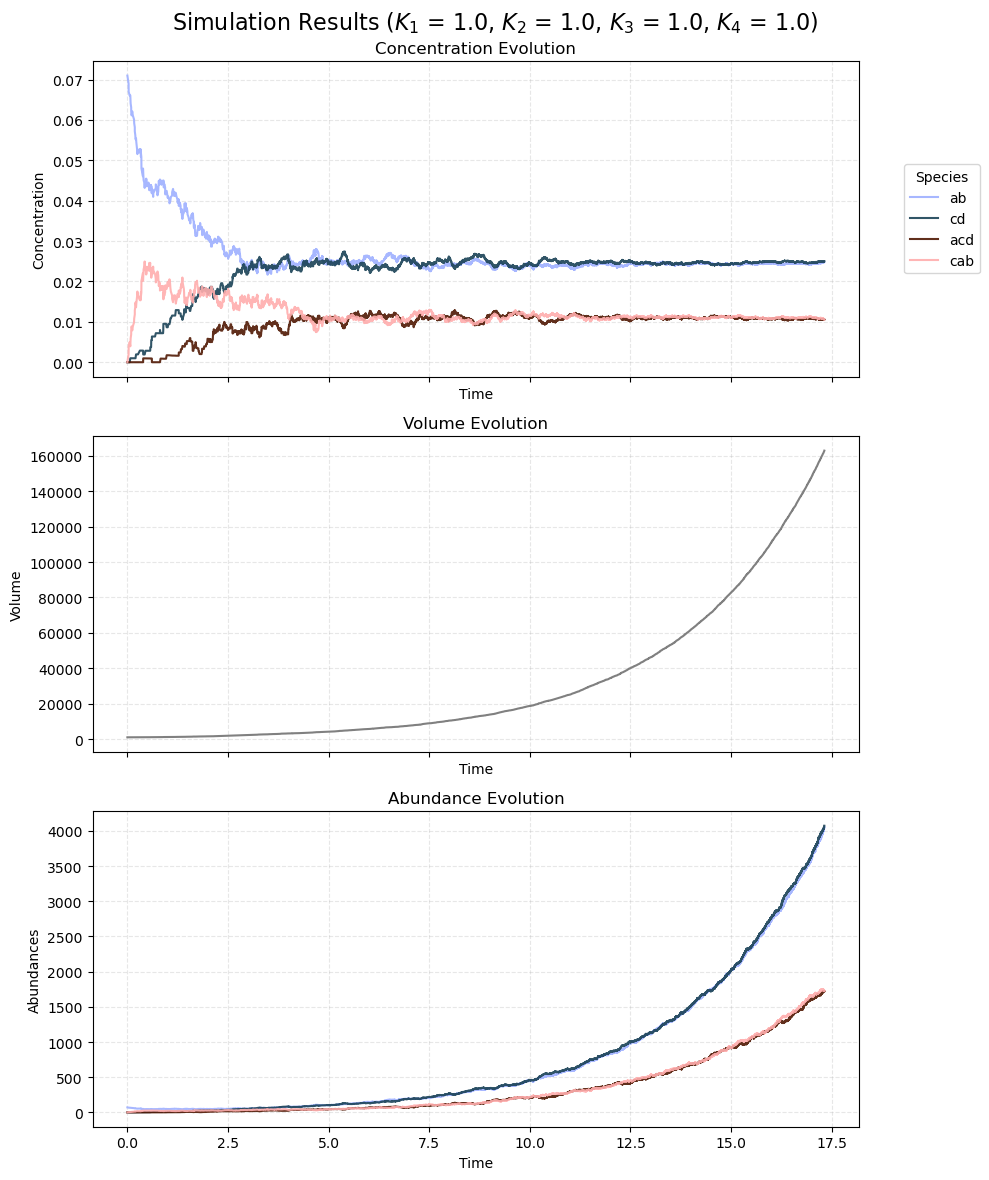

81


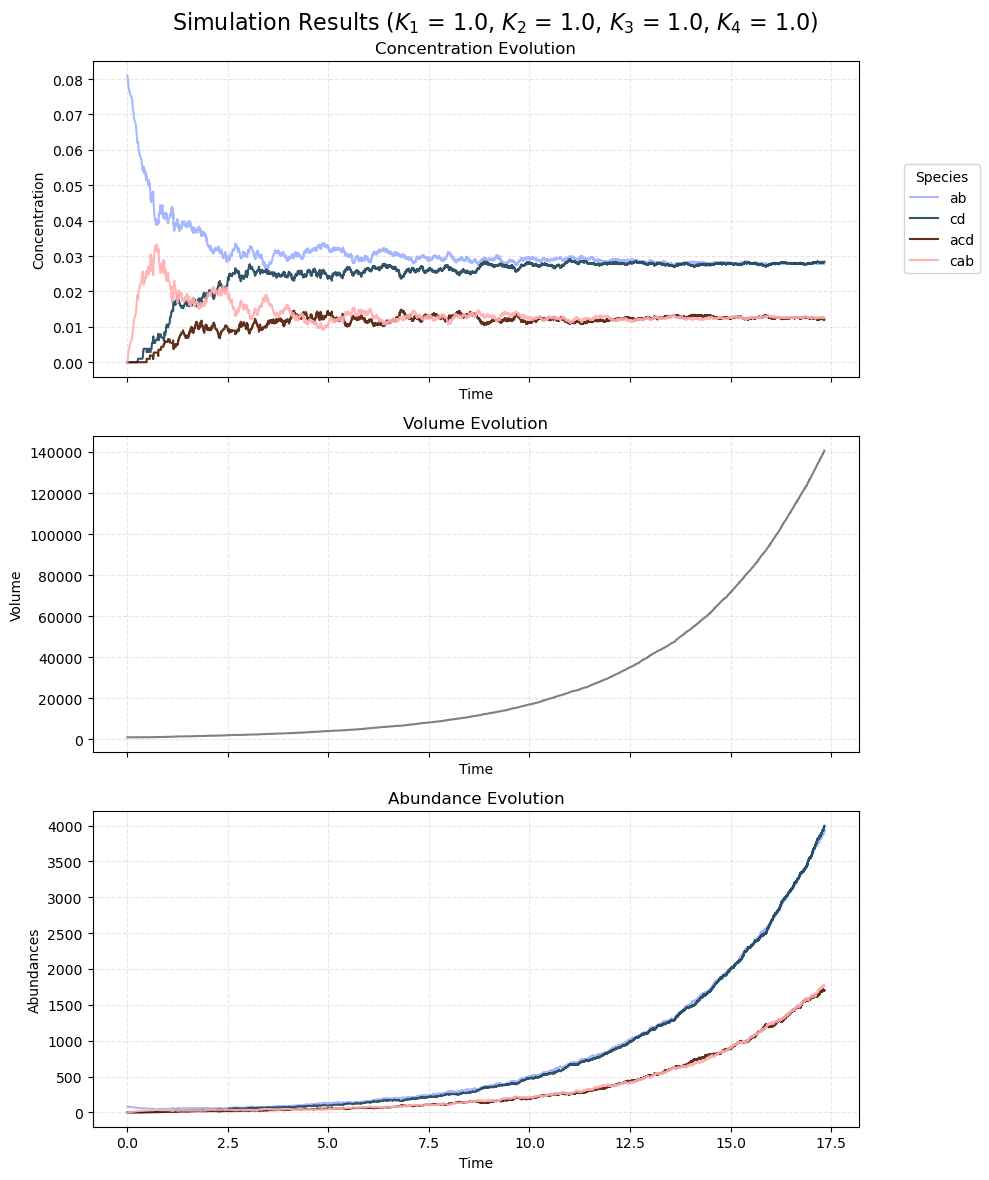

91


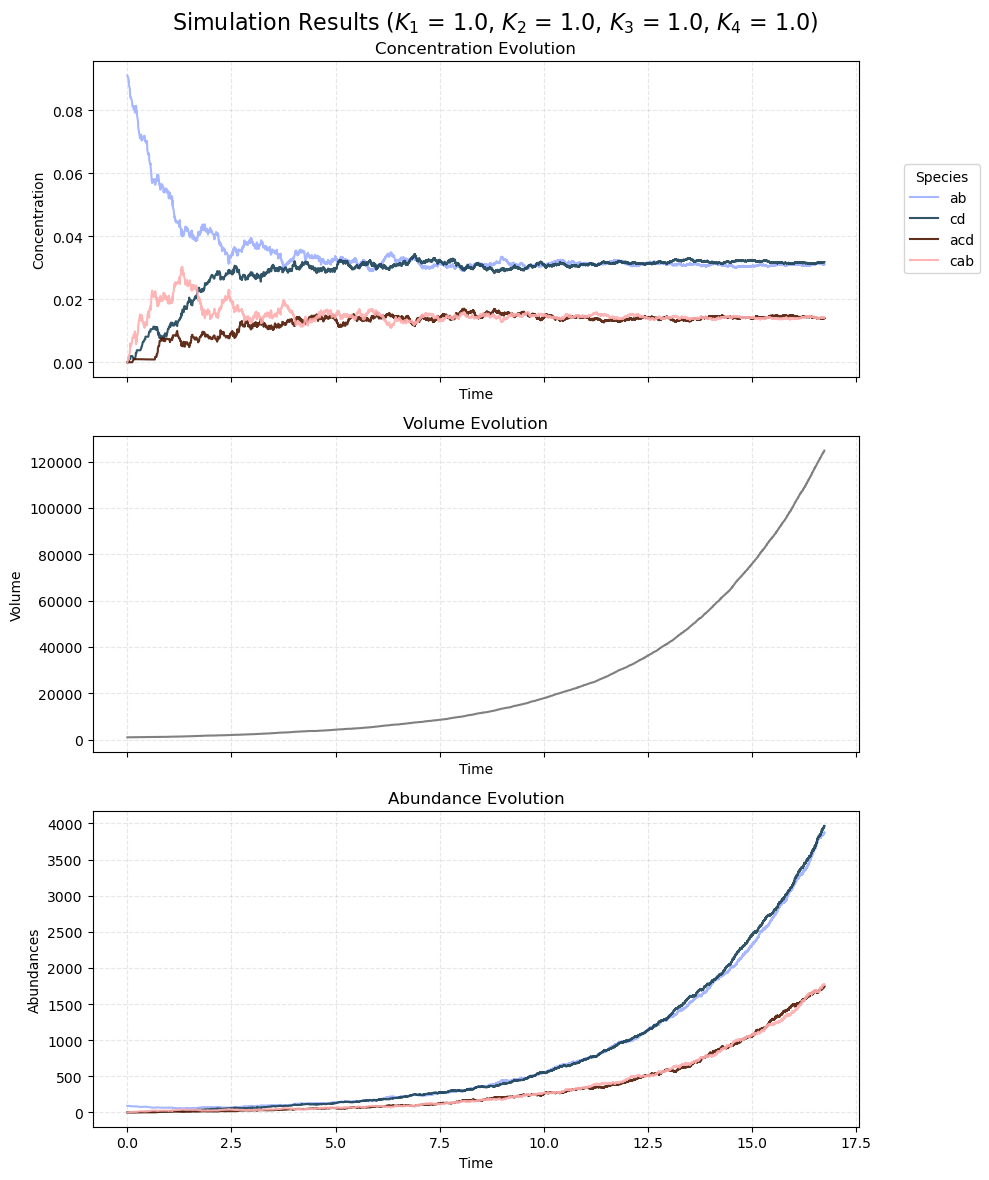

In [11]:
n_iterations = 1e5
method = "Protocell" # Gillespie or Deterministic
# Reaction constants:
k = [1]*8 # len(k)= # de reacciones
# Volume:
V = 1000
initial_food = [1000]*4 + [0]*4 # initial molecules number

catal_abundances = range(1,100,10)

for total_abundance in catal_abundances:
    initial_food[4] = total_abundance
    print(initial_food[4])
    abundances, times, volumes = chemistry(method, n_iterations, reactions,
                            initial_food, k, V)
    
    plot(abundances[:,4:], times, volumes, species[4:])

# figura molona barrido

In [10]:
from random import random
n_iterations = 2e5
method = "Protocell" # Gillespie or Deterministic
# Reaction constants:
k = [1]*8 # len(k)= # de reacciones
# Volume:
V = 1000
initial_food = [1000]*4 + [0]*4 # initial molecules number
concentration = 1
final_concentrations = []
initial_conditions = []

total_abundance = concentration * V
for i in range(11):
    for j in range(4, len(species)):
        initial_food[j] = random()
        
    total_0 = sum(initial_food[4:])
    for j in range(4, len(species)):
        initial_food[j] = (initial_food[j]/total_0)*concentration*V
    
    print(f"Performing simulation for\
          [ab] = {initial_food[4]},\
          [cd] = {initial_food[5]},\
          [acd] = {initial_food[6]},\
              [cab] = {initial_food[7]}")
    
    abundances, times, volumes = chemistry(method, n_iterations, reactions,
                            initial_food, k, V)
    
    concentrations = (abundances.T / volumes).T
    
    initial_conditions.append(initial_food[4:])
    final_concentrations.append(np.mean(concentrations[-500:,4:], axis= 0))
    
initial_conditions = np.array(initial_conditions)
final_concentrations = np.array(final_concentrations)        

Performing simulation for          [ab] = 200.65175947809857,          [cd] = 285.22268312430526,          [acd] = 187.4155906476895,              [cab] = 326.70996674990664
Performing simulation for          [ab] = 390.8617747864471,          [cd] = 65.83869394432156,          [acd] = 398.12220280340927,              [cab] = 145.17732846582214
Performing simulation for          [ab] = 87.1694097243349,          [cd] = 388.43250883537576,          [acd] = 267.6366815427087,              [cab] = 256.76139989758065
Performing simulation for          [ab] = 243.20327477054946,          [cd] = 420.8961052494592,          [acd] = 263.8273233388314,              [cab] = 72.07329664115994
Performing simulation for          [ab] = 274.50462977209224,          [cd] = 223.24188094050038,          [acd] = 387.5311036278958,              [cab] = 114.7223856595117
Performing simulation for          [ab] = 362.3479409851989,          [cd] = 181.30743721451725,          [acd] = 153.48223714914914,   

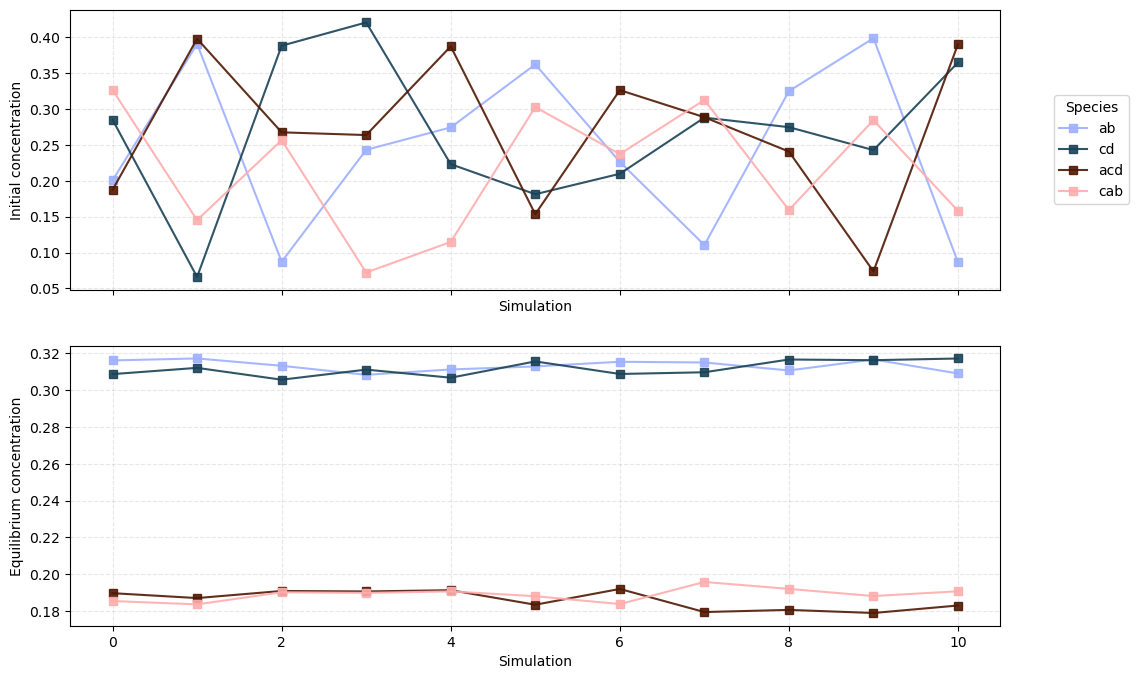

In [14]:
plot_barrido(initial_conditions/V, final_concentrations, species[4:])


# figura cambio de vol con condicion inicial

In [32]:
n_iterations = 1.5e5
method = "Protocell" # Gillespie or Deterministic
# Reaction constants:
k = [1]*8 # len(k)= # de reacciones
# Volume:
V = 1000
initial_food = [1000]*4 + [0]*4 # initial molecules number
final_volume = []
initial_ab = np.linspace(1000,7000,6)

for ab in initial_ab:
    initial_food[4] = ab
    print(f"Performing simulation for [ab]={ab}")
    abundances, times, volumes = chemistry(method, n_iterations, reactions,
                            initial_food, k, V)
    print(f"Simulation ended. Final volume = {volumes[-1]}")
    
    try:
        print(f"Volume at t= 10 = {volumes[times>10][0]}")
        final_volume.append(volumes[times>10][0])
    except IndexError:
        final_volume.append(volumes[-1])
    

Performing simulation for [ab]=1000.0
Simulation ended. Final volume = 7198.0
Volume at t= 10 = 6065.0
Performing simulation for [ab]=2200.0
Simulation ended. Final volume = 2346.363636363636
Performing simulation for [ab]=3400.0
Simulation ended. Final volume = 1476.1764705882354
Performing simulation for [ab]=4600.0
Criterion for stop was # of iterations
Simulation ended. Final volume = 923.913043478261
Volume at t= 10 = 1032.1739130434783
Performing simulation for [ab]=5800.0
Criterion for stop was # of iterations
Simulation ended. Final volume = 547.5862068965517
Volume at t= 10 = 738.6206896551724
Performing simulation for [ab]=7000.0
Criterion for stop was # of iterations
Simulation ended. Final volume = 435.0
Volume at t= 10 = 577.8571428571429


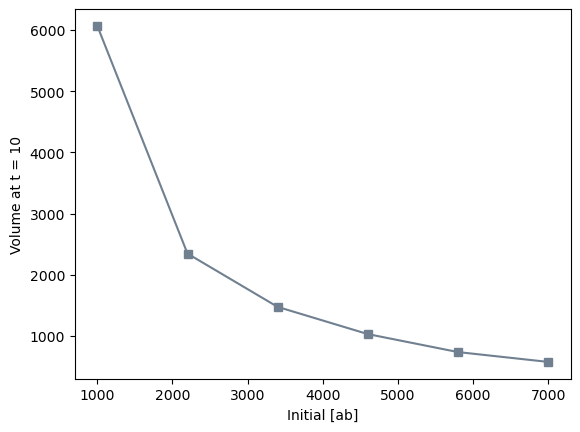

In [35]:
plot_volume(final_volume, initial_ab)

# cambio de volumen con K

In [91]:
n_iterations = 5e5
method = "Protocell" # Gillespie or Deterministic
# Reaction constants:
k = [1]*8 # len(k)= # de reacciones
# Volume:
V = 1000
initial_food = [1000]*4 + [500]*2 + [0]*2 # initial molecules number
final_volume = []
k_change = np.logspace(-3,4,8)
simulations_k = {}

for k_i in k_change:
    k[0] = k_i
    print(f"Performing simulation for k = {k_i}")
    abundances, times, volumes = chemistry(method, n_iterations, f,
                            initial_food, k, V)
    print(f"Simulation ended. Final volume = {volumes[-1]}")
    simulations_k[k_i] = (abundances, times, volumes)

Performing simulation for k = 0.001
Simulation ended. Final volume = 909.0
Performing simulation for k = 0.01
Simulation ended. Final volume = 895.0
Performing simulation for k = 0.1
Simulation ended. Final volume = 1908.0
Performing simulation for k = 1.0
Simulation ended. Final volume = 6856.0
Performing simulation for k = 10.0
Simulation ended. Final volume = 11155.0
Performing simulation for k = 100.0
Simulation ended. Final volume = 12082.0
Performing simulation for k = 1000.0
Simulation ended. Final volume = 12264.0
Performing simulation for k = 10000.0
Simulation ended. Final volume = 12417.0


In [96]:
with open("simulacion_barrido_k1.txt", "ab") as file:
    pickle.dump(simulations_k, file)

In [93]:
fit = get_alpha_global(simulations_k)
print(fit.to_string(index=False, float_format="%.4f"))

 Initial [AB]  Alpha  Scaling Const. (A)    R^2
       0.0010 0.0000            858.3199 0.1078
       0.0100 0.0000            884.9649 0.0809
       0.1000 0.0123            831.4480 0.9918
       1.0000 0.1773            907.0835 0.9996
      10.0000 0.4391            916.7888 0.9999
     100.0000 0.5020           1099.3846 0.9998
    1000.0000 0.5226           1038.4913 0.9999
   10000.0000 0.5250           1083.3958 0.9999


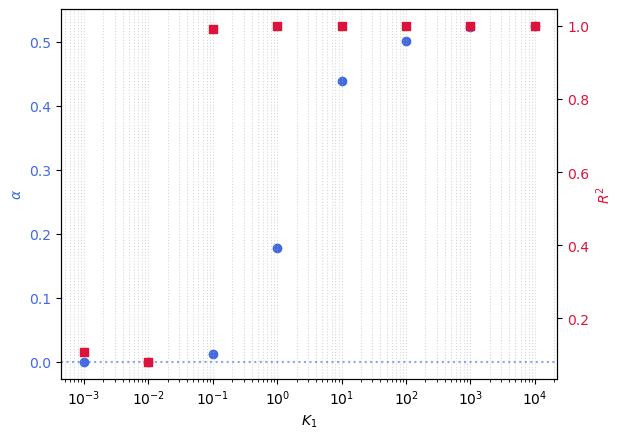

In [ ]:
fig, ax1 = plt.subplots()

ax1.set_xlabel(r'$K_1$') 
ax1.set_ylabel(r'$\alpha$', color="royalblue")
ax1.scatter(fit['Initial [AB]'], fit['Alpha'], 
            color="royalblue", marker='o')

ax1.tick_params(axis='y', labelcolor="royalblue")
ax1.grid(True, linestyle=':', alpha=0.5, which='both', axis='x')
ax1.axhline(y= 0, color= "royalblue", alpha= 0.6, linestyle=":")
ax1.set_xscale("log")
ax2 = ax1.twinx()  

ax2.set_ylabel(r'$R^2$', color="crimson")  
ax2.scatter(fit['Initial [AB]'], fit['R^2'], 
            color="crimson", marker='s')
ax2.set_xscale("log")
ax2.tick_params(axis='y', labelcolor="crimson")

In [18]:
with open("simulacion_barrido_k1.txt", "rb") as file:
    simulations_k = pickle.load(file)

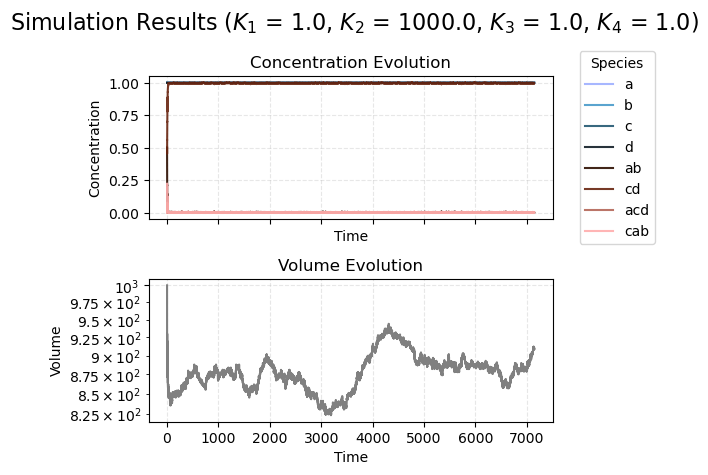

Regression completed. Fitted Scaling Constant A: 858.322
Fitted exponential rate m (alpha): 0.000
Coefficient of Determination (R^2): 0.1078


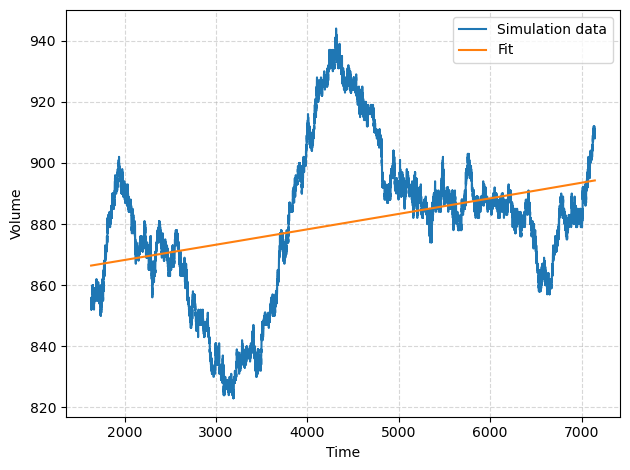

Plot generated successfully.


In [28]:
abundances, times, volumes = simulations_k[0.001]
plot(abundances, times, volumes, species)
plot_ajuste(volumes[round(len(volumes)/3):], times[round(len(volumes)/3):])

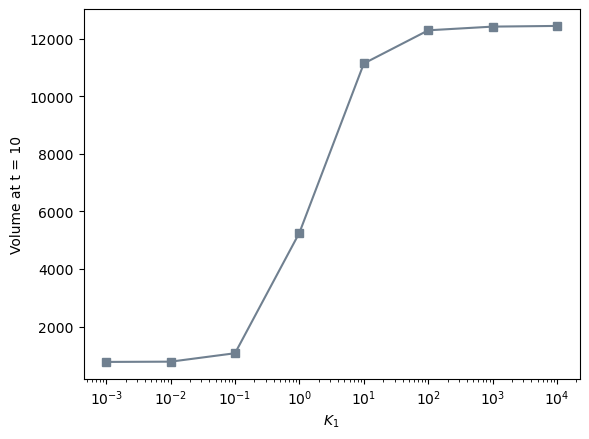

In [58]:
plot_volume_vs_k(final_volume, k_change, k, 0)

In [ ]:
n_iterations = 5e5
method = "Protocell" # Gillespie or Deterministic
# Reaction constants:
k = [1]*8 # len(k)= # de reacciones
# Volume:
V = 1000
initial_food = [1000]*4 + [500]*2 + [0]*2 # initial molecules number
final_volume = []
k_change = np.logspace(-3,4,8)
simulations_k2 = {}

for k_i in k_change:
    k[2] = k_i
    print(f"Performing simulation for k = {k_i}")
    abundances, times, volumes = chemistry(method, n_iterations, f,
                            initial_food, k, V)
    print(f"Simulation ended. Final volume = {volumes[-1]}")
    simulations_k2[k_i] = (abundances, times, volumes)


Performing simulation for k = 0.001
Criterion for stop was # of iterations
Simulation ended. Final volume = 1049.0
Performing simulation for k = 0.01
Simulation ended. Final volume = 1552.0
Performing simulation for k = 0.1
Simulation ended. Final volume = 2195.0
Performing simulation for k = 1.0
Simulation ended. Final volume = 6858.0
Performing simulation for k = 10.0
Simulation ended. Final volume = 10726.0
Performing simulation for k = 100.0
Simulation ended. Final volume = 11582.0
Performing simulation for k = 1000.0
Simulation ended. Final volume = 11779.0
Performing simulation for k = 10000.0
Simulation ended. Final volume = 11839.0


In [99]:
with open("simulacion_barrido_k2.txt", "ab") as file:
    pickle.dump(simulations_k2, file)

In [11]:
with open("simulacion_barrido_k2.txt", "rb") as file:
    simulations_k2 = pickle.load(file)

In [17]:
fit = get_alpha_global(simulations_k2)
print(fit.to_string(index=False, float_format="%.4f"))

 Initial [AB]  Alpha  Scaling Const. (A)    R^2
       0.0010 0.0002            942.4355 0.9688
       0.0100 0.0029            974.0330 0.9908
       0.1000 0.0271           1002.8551 0.9974
       1.0000 0.1834            834.9446 0.9997
      10.0000 0.3545            906.7202 0.9999
     100.0000 0.3985            964.1442 0.9999
    1000.0000 0.4009           1031.2532 0.9999
   10000.0000 0.3958           1082.4758 0.9996


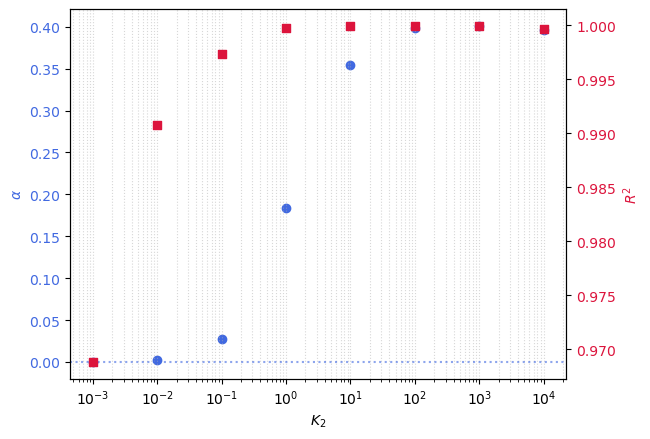

In [18]:
fig, ax1 = plt.subplots()

ax1.set_xlabel(r'$K_2$') 
ax1.set_ylabel(r'$\alpha$', color="royalblue")
ax1.scatter(fit['Initial [AB]'], fit['Alpha'], 
            color="royalblue", marker='o')

ax1.tick_params(axis='y', labelcolor="royalblue")
ax1.grid(True, linestyle=':', alpha=0.5, which='both', axis='x')
ax1.axhline(y= 0, color= "royalblue", alpha= 0.6, linestyle=":")
ax1.set_xscale("log")
ax2 = ax1.twinx()  

ax2.set_ylabel(r'$R^2$', color="crimson")  
ax2.scatter(fit['Initial [AB]'], fit['R^2'], 
            color="crimson", marker='s')
ax2.set_xscale("log")
ax2.tick_params(axis='y', labelcolor="crimson")

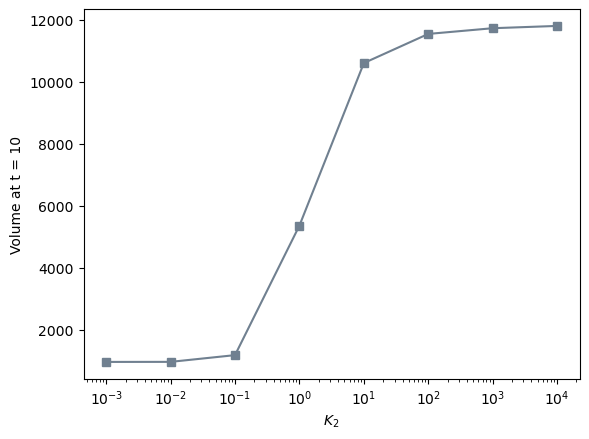

In [60]:
plot_volume_vs_k(final_volume, k_change, k, 2)

In [10]:
abundances, times, volumes = simulations_k2[0.001]

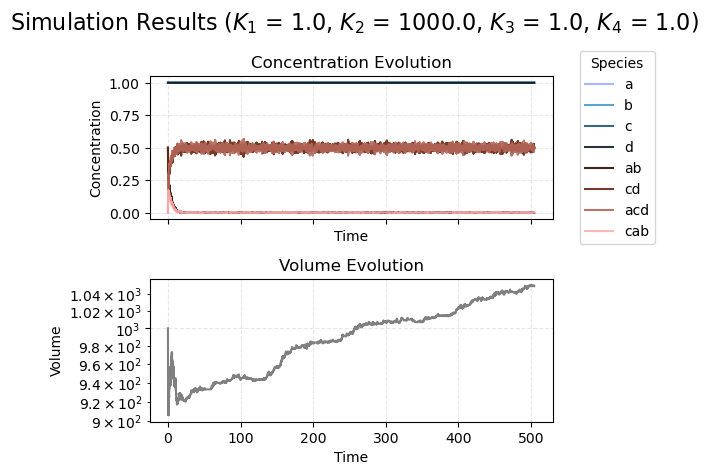

Regression completed. Fitted Scaling Constant A: 942.435
Fitted exponential rate m (alpha): 0.000
Coefficient of Determination (R^2): 0.9688


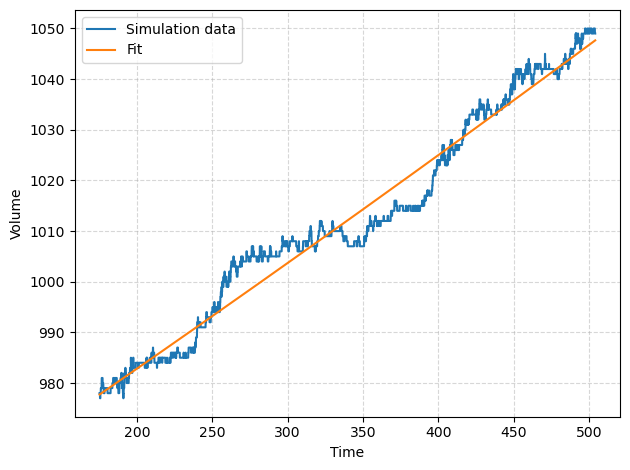

Plot generated successfully.


In [17]:
k= [1,1,0.001,1,1,1,1,1]
plot(abundances, times, volumes, species)
plot_ajuste(volumes[round(len(volumes)/3):], times[round(len(volumes)/3):])


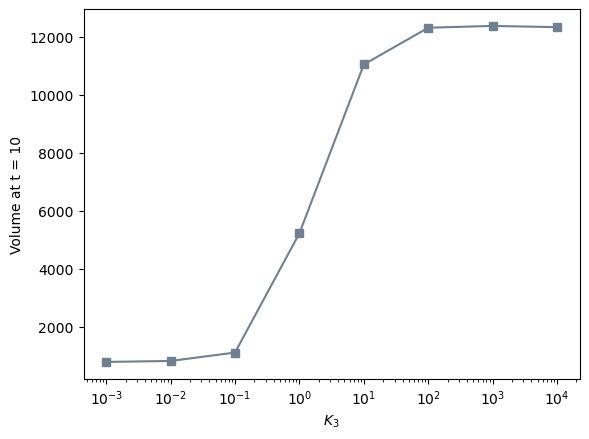

In [12]:
plot_volume_vs_k(final_volume, k_change, k, 4)